### EXPLORATORY DATA ANALYSIS ON UNICORN COMPANIES DATASET

### EXPLORATORY DATA ANALYSIS STEPS
- Importing the required Libraries for EDA
- Acquiring the dataset
- Data Preparation
- Data Profiling
- Data Cleaning
    1. Dropping Duplicates
    2. Removing Missing Values
- Finding Outliers
- Finding Correlations
- Visualizations

In [16]:
# Importing the required Libraries for EDA
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [17]:
# Assign df as pandas DataFrame
df = pd.DataFrame()

In [18]:
# Acquire the dataset
df = pd.read_csv(r"Unicorn_Companies.csv")

In [19]:
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [20]:
# first 10 rows of data
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [21]:
# last 10 rows of data
df.tail(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1064,Xendit,$1B,2021-09-14,Fintech,Jakarta,Indonesia,Asia,2014,$215M,"Accel, Y Combinator, Amasia"
1065,XForcePlus,$1B,2021-06-01,Internet software & services,Shanghai,China,Asia,2015,$200M,"Eastern Bell Capital, Danhua Capital, MSA Capital"
1066,YH Global,$1B,2017-09-21,"Supply chain, logistics, & delivery",Shenzhen,China,Asia,1997,$182M,"Co-Energy Finance, Grandland"
1067,YipitData,$1B,2021-12-06,Internet software & services,New York,United States,North America,2008,$492M,"RRE Ventures+, Highland Capital Partners, The ..."
1068,Yunxuetang,$1B,2021-03-29,Edtech,Suzhou,China,Asia,2011,$389M,"Matrix Partners China, Sequoia Capital China, ..."
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


### DATA PROFILING STEPS
- **Data profiling utilizes methods of descriptive statistics such as:**
    
      1. Data type
      2. Quantile statistics (central tendecies)
      3. Length (length and shape of the dataset)
      4. Discrete values
      5. Uniqueness (unique values)
      6. Occurence of null values and etc.

In [22]:
# shape of the data
df.shape

(1074, 10)

In [23]:
df.size

10740

In [24]:
# check the columns
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [25]:
df.columns.tolist()

['Company',
 'Valuation',
 'Date Joined',
 'Industry',
 'City',
 'Country',
 'Continent',
 'Year Founded',
 'Funding',
 'Select Investors']

In [26]:
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [27]:
# Data Profiling
# check the descriptive statistics
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [28]:
df.describe().astype(int)

,Year Founded
count,1074
mean,2012
std,5
min,1919
25%,2011
50%,2014
75%,2016
max,2021


In [29]:
# check the data types
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [30]:
# Check for missing values
# The below doesn't give me explicit description of the null details
df.isnull()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1069,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False


In [31]:
# The below is better explicit
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [32]:
# check for numerical columns
categorical_cols = df.select_dtypes(include = [int, float]).columns.tolist()
categorical_cols

['Year Founded']

In [33]:
# check for categorical columns
numerical_cols = df.select_dtypes(include = ['category', 'object']).columns
numerical_cols

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Funding', 'Select Investors'],
      dtype='object')

In [34]:
df.describe(include= ['object'])

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074,1073
unique,1073,30,639,16,256,46,6,539,1058
top,Bolt,$1B,2021-07-13,Fintech,San Francisco,United States,North America,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,60,3


In [35]:
df.Continent.unique()

array(['Asia', 'North America', 'Europe', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [36]:
df.Industry.unique().tolist()

['Artificial intelligence',
 'Other',
 'E-commerce & direct-to-consumer',
 'Fintech',
 'Internet software & services',
 'Supply chain, logistics, & delivery',
 'Consumer & retail',
 'Data management & analytics',
 'Edtech',
 'Health',
 'Hardware',
 'Auto & transportation',
 'Travel',
 'Cybersecurity',
 'Mobile & telecommunications',
 'Artificial Intelligence']

In [37]:
df.Country.unique().tolist()

['China',
 'United States',
 'Sweden',
 'Australia',
 'United Kingdom',
 'Bahamas',
 'India',
 'Indonesia',
 'Turkey',
 'Estonia',
 'Germany',
 'Hong Kong',
 'South Korea',
 'Mexico',
 'Canada',
 'Netherlands',
 'France',
 'Finland',
 'Israel',
 'Lithuania',
 'Denmark',
 'Belgium',
 'Colombia',
 'Brazil',
 'Singapore',
 'Austria',
 'Ireland',
 'United Arab Emirates',
 'Switzerland',
 'Vietnam',
 'South Africa',
 'Thailand',
 'Norway',
 'Chile',
 'Argentina',
 'Bermuda',
 'Japan',
 'Spain',
 'Malaysia',
 'Senegal',
 'Philippines',
 'Luxembourg',
 'Nigeria',
 'Czech Republic',
 'Croatia',
 'Italy']

In [38]:
df.City.unique()

array(['Beijing', 'Hawthorne', 'Shenzhen', 'San Francisco', 'Stockholm',
       'Surry Hills', 'London', 'Cary', nan, 'Jacksonville', 'Bengaluru',
       'Jakarta', 'Shanghai', 'Philadelphia', 'Waltham', 'New York',
       'Pittsburgh', 'Istanbul', 'San Diego', 'Roseville', 'Changsha',
       'Tallinn', 'Luohe', 'Munich', 'Gurugram', 'Boston', 'Glendale',
       'Cheung Sha Wan', 'Walpole', 'Seoul', 'Fremont', 'Mountain View',
       'Lerma de Villada', 'Berlin', 'Kirkland', 'Mumbai', 'Santa Clara',
       'Vancouver', 'San Jose', 'San Mateo', 'Irving', 'Chicago',
       'Redwood City', 'Hoboken', 'Palo Alto', 'Toronto', 'Los Angeles',
       'Hangzhou', 'Changzhou', 'Melbourne', 'Amsterdam', 'Paris',
       'Oakland', 'Brooklyn', 'Helsinki', 'Burlingame', 'Tel Aviv',
       'Zhuhai', 'Guangzhou', 'Vilnius', 'Irvine', 'Copenhagen',
       'Brussels', 'Bogota', 'Sao Paulo', 'Atlanta', 'Campinas',
       'Montreal', 'Bellevue', 'Gurgaon', 'Noida', 'Suzhou', 'El Segundo',
       'Faridaba

In [39]:
# Selcting the only Company among the Unicorns from 'Nigeria'
selected_rows = df.loc[df['Country'] == 'Nigeria']
selected_rows

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
585,Opay,$2B,2021-08-23,Fintech,Lagos,Nigeria,Africa,2018,$570M,"Sequoia Capital China, Source Code Capital, Re..."


### Data Cleaning Processes
- Convert the **Date Joined** column from a "string" to a "Datetime"
- Fill the missing values in **City** with "Uknown"
- Fill the missing value in **Select Investors** with "Uknown"
- Replace the "Artificial intelligence" in **Industry** column with "Artificial Intelligence"
- Replace the string "Unknown" in **Funding** with "0"
- Convert the **Valuation** Column from a "string" to a "float" with the "$" sign

- Convert the **Funding** column from a "string" to a "float" with the "$" sign

In [40]:
# Convert the 'Date Joined' column from a 'string' to a 'Datetime'
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [41]:
df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [42]:
# Convert the 'Year Founded' column from an 'int64' to a 'Datetime'


#df['Year Founded'] = pd.to_datetime(df['Year Founded'], format = '%Y'), datetime_is_numeric= True)

# Extract the year from the datetime object and store it in a new column
# df['Year Founded2'] = df['Year Founded'].dt.strftime('%Y')

# Convert the Year Founded2 column back to datetime format
# df['Year Founded2'] = pd.to_datetime(df['Year Founded2'], format = '%Y')

In [43]:
df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [44]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [45]:
# Replace the "Artificial intelligence" in **Industry** column with "Artificial Intelligence"
df['Industry'] = df['Industry'].replace('Artificial intelligence', 'Artificial Intelligence')

df.describe(include= ['object'])

,Company,Valuation,Industry,City,Country,Continent,Funding,Select Investors
count,1074,1074,1074,1058,1074,1074,1074,1073
unique,1073,30,15,256,46,6,539,1058
top,Bolt,$1B,Fintech,San Francisco,United States,North America,$1B,Sequoia Capital
freq,2,471,224,152,562,589,60,3


In [46]:
df.Industry.unique().tolist()

['Artificial Intelligence',
 'Other',
 'E-commerce & direct-to-consumer',
 'Fintech',
 'Internet software & services',
 'Supply chain, logistics, & delivery',
 'Consumer & retail',
 'Data management & analytics',
 'Edtech',
 'Health',
 'Hardware',
 'Auto & transportation',
 'Travel',
 'Cybersecurity',
 'Mobile & telecommunications']

In [47]:
# fill the missing values in city with 'Uknown'
df['City'] = df['City'].fillna('Unknown')

In [48]:
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    1
dtype: int64

In [49]:
# fill the missing value in 'Select Investors' with 'Unknown'
df['Select Investors'] = df['Select Investors'].fillna('Unknown')

In [50]:
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [51]:
# find the row column row data string 'Unknown' in the 'Funding' column
df[df['Funding'] == 'Unknown'].head(12)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
215,SSENSE,$4B,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,Unknown,Sequoia Capital
424,Uplight,$2B,2021-03-03,Other,Boulder,United States,North America,2019,Unknown,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,$2B,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,Unknown,Blackstone
639,SITECH DEV,$1B,2019-05-16,Other,Guiyang,China,Asia,2017,Unknown,China Prosperity Capital
651,Xiaobing,$1B,2021-07-12,Fintech,Beijing,China,Asia,2020,Unknown,"NetEase Capital, Northern Light Venture Capita..."
717,Veepee,$1B,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,Unknown,"Summit Partners, Qatar Holding"
733,DistroKid,$1B,2021-08-16,Internet software & services,New York,United States,North America,2013,Unknown,"Insight Partners, Silversmith Capital Partners..."
866,Assembly,$1B,2021-09-21,Internet software & services,Culver City,United States,North America,2019,Unknown,"Advent International, PSG, Providence Equity P..."
890,Carson Group,$1B,2021-07-14,Fintech,Lincoln,United States,North America,2012,Unknown,Bain Capital
945,Iodine Software,$1B,2021-12-01,Data management & analytics,Austin,United States,North America,2010,Unknown,"Advent International, Bain Capital Ventures, S..."


In [52]:
# Replace the string "Unknown" in Funding with "0"
df['Funding'] = df['Funding'].replace('Unknown', '0')

In [53]:
df[df['Funding'] == 'Unknown'].head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors


In [54]:
df[df['Funding'] == '0'].head(12)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
215,SSENSE,$4B,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,0,Sequoia Capital
424,Uplight,$2B,2021-03-03,Other,Boulder,United States,North America,2019,0,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,$2B,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,0,Blackstone
639,SITECH DEV,$1B,2019-05-16,Other,Guiyang,China,Asia,2017,0,China Prosperity Capital
651,Xiaobing,$1B,2021-07-12,Fintech,Beijing,China,Asia,2020,0,"NetEase Capital, Northern Light Venture Capita..."
717,Veepee,$1B,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,0,"Summit Partners, Qatar Holding"
733,DistroKid,$1B,2021-08-16,Internet software & services,New York,United States,North America,2013,0,"Insight Partners, Silversmith Capital Partners..."
866,Assembly,$1B,2021-09-21,Internet software & services,Culver City,United States,North America,2019,0,"Advent International, PSG, Providence Equity P..."
890,Carson Group,$1B,2021-07-14,Fintech,Lincoln,United States,North America,2012,0,Bain Capital
945,Iodine Software,$1B,2021-12-01,Data management & analytics,Austin,United States,North America,2010,0,"Advent International, Bain Capital Ventures, S..."


In [55]:
# Convert the Valuation Column from a "string" to a "float".

# Define a custom function to convert the string to float
def convert_valuation(valuation_str):
    # Remove the '$' signs from the string
    valuation_num = valuation_str.replace('$', ' ')
    
    # Extract the numerical part of the string
    numeric_part = valuation_num[:-1]
    
    # Get the last character to determine the scale (Billion or Million)
    scale = valuation_num[-1]
    
    # Multiply the numeric value based on the scale
    if  scale == 'B':
        valuation_float = float(numeric_part) * 1e9
    elif scale == 'M':
        valuation_float = float(numeric_part) * 1e6
    else:
        raise ValueError('Invalid scale: {}', format(scale))
        
    # Add back the '$' sign and return as a Decimal object
    return float(valuation_float)

# Apply the custom function to the "Funding" column and create a new column 'Funding Decimal'
df['Valuation Decimal'] = df['Valuation'].apply(convert_valuation)
    
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation Decimal
0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",1.000000e+11
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10


In [56]:
df.dtypes

Company                      object
Valuation                    object
Date Joined          datetime64[ns]
Industry                     object
City                         object
Country                      object
Continent                    object
Year Founded                  int64
Funding                      object
Select Investors             object
Valuation Decimal           float64
dtype: object

In [57]:
# Convert the Funding Column from a "string" to a "float".

# Define a custom function to convert the string to Decimal
def convert_funding(funding_str):
    # Remove the '$' signs from the string
    funding_num = funding_str.replace('$', ' ')
    
    # Extract the numerical part of the string
    numeric_part = funding_num[:-1]
    
    # Get the last character to determine the scale (Billion or Million)
    scale = funding_num[-1]
    
    # Multiply the numeric value based on the scale
    if  scale == 'B':
        funding_float = float(numeric_part) * 1e9
    elif scale == 'M':
        funding_float = float(numeric_part) * 1e6
    elif scale == '0':
        funding_float = '0'
    else:
        raise ValueError('Invalid scale: {}', format(scale))
        
    # Add back the '$' sign and return as a Decimal object
    return float(funding_float)

# Apply the custom function to the "Funding" column and create a new column 'Funding Decimal'
df['Funding Decimal'] = df['Funding'].apply(convert_funding)
    
df.head()


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Valuation Decimal,Funding Decimal
0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11,8.000000e+09
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11,7.000000e+09
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",1.000000e+11,2.000000e+09
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10,2.000000e+09
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10,4.000000e+09


In [58]:
df.dtypes

Company                      object
Valuation                    object
Date Joined          datetime64[ns]
Industry                     object
City                         object
Country                      object
Continent                    object
Year Founded                  int64
Funding                      object
Select Investors             object
Valuation Decimal           float64
Funding Decimal             float64
dtype: object

In [59]:
# drop the 'Valuation' and 'Funding' columns so that we can use the new one created
df.drop(columns= ['Valuation', 'Funding'], inplace= True)
df.dtypes

Company                      object
Date Joined          datetime64[ns]
Industry                     object
City                         object
Country                      object
Continent                    object
Year Founded                  int64
Select Investors             object
Valuation Decimal           float64
Funding Decimal             float64
dtype: object

In [60]:
df.head()

,Company,Date Joined,Industry,City,Country,Continent,Year Founded,Select Investors,Valuation Decimal,Funding Decimal
0,Bytedance,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11,8.000000e+09
1,SpaceX,2012-12-01,Other,Hawthorne,United States,North America,2002,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11,7.000000e+09
2,SHEIN,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,"Tiger Global Management, Sequoia Capital China...",1.000000e+11,2.000000e+09
3,Stripe,2014-01-23,Fintech,San Francisco,United States,North America,2010,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10,2.000000e+09
4,Klarna,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10,4.000000e+09


In [61]:
# Rename the 'Valuation Decimal' and 'Funding Decimal' back to 'Valuation' and 'Funding'
df.rename(columns={'Valuation Decimal' : 'Valuation'}, inplace= True)
df.rename(columns={'Funding Decimal' : 'Funding'}, inplace= True)

df.dtypes

Company                     object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Select Investors            object
Valuation                  float64
Funding                    float64
dtype: object

In [62]:
df.head()

,Company,Date Joined,Industry,City,Country,Continent,Year Founded,Select Investors,Valuation,Funding
0,Bytedance,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,"Sequoia Capital China, SIG Asia Investments, S...",1.800000e+11,8.000000e+09
1,SpaceX,2012-12-01,Other,Hawthorne,United States,North America,2002,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1.000000e+11,7.000000e+09
2,SHEIN,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,"Tiger Global Management, Sequoia Capital China...",1.000000e+11,2.000000e+09
3,Stripe,2014-01-23,Fintech,San Francisco,United States,North America,2010,"Khosla Ventures, LowercaseCapital, capitalG",9.500000e+10,2.000000e+09
4,Klarna,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,"Institutional Venture Partners, Sequoia Capita...",4.600000e+10,4.000000e+09


In [63]:
# Change the position of the column 'Valuation' back to where it was initially
column_names= df.columns.tolist()

# Remove the 'Valuation' column from the current position
valuation_col = column_names.pop(column_names.index('Valuation'))

# Insert the 'Valuation' column at the desired position
column_names.insert(1, valuation_col)

# Reindex the dataframe with the new column order
df = df.reindex(columns= column_names)
    
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Select Investors,Funding
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,"Sequoia Capital China, SIG Asia Investments, S...",8.000000e+09
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,"Founders Fund, Draper Fisher Jurvetson, Rothen...",7.000000e+09
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,"Tiger Global Management, Sequoia Capital China...",2.000000e+09
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,"Khosla Ventures, LowercaseCapital, capitalG",2.000000e+09
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,"Institutional Venture Partners, Sequoia Capita...",4.000000e+09


In [64]:
# Change the positions of the columns 'Funding' back to where they were initially
column_names= df.columns.tolist()

# Remove the 'Valuation' column from the current position
valuation_col = column_names.pop(column_names.index('Funding'))

# Insert the 'Valuation' column at the desired position
column_names.insert(8, valuation_col)

# Reindex the dataframe with the new column order
df = df.reindex(columns= column_names)
    
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [65]:
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012,2.000000e+09,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,1.400000e+10,Tiger Global Management
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates..."


### Further EXploratory Data Analysis after Data Cleaning

#### Data Profiling

In [9]:
# Recheck the data size
df.shape

(1074, 10)

In [10]:
# Recheck the data size
df.size

10740

In [11]:
# Recheck the data columns
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [12]:
# Recheck the data types
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [66]:
# Recheck the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 84.0+ KB


In [67]:
# Recheck for null values
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [72]:
# Check for negative values in 'Valuation'
df[df['Valuation'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors


In [73]:
# Check for negative values in 'Valuation'
df[df['Funding'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors


In [70]:
df.describe(include= ['object'])

,Company,Industry,City,Country,Continent,Select Investors
count,1074,1074,1074,1074,1074,1074
unique,1073,15,257,46,6,1059
top,Bolt,Fintech,San Francisco,United States,North America,Sequoia Capital
freq,2,224,152,562,589,3


In [71]:
df['Year Founded'].describe().astype(int)

count    1074
mean     2012
std         5
min      1919
25%      2011
50%      2014
75%      2016
max      2021
Name: Year Founded, dtype: int32

In [59]:
df[['Valuation', 'Funding']].describe().astype(float)

,Valuation,Funding
count,1.074000e+03,1.074000e+03
mean,3.455307e+09,5.510428e+08
std,8.547022e+09,8.077194e+08
min,1.000000e+09,0.000000e+00
25%,1.000000e+09,2.180000e+08
50%,2.000000e+09,3.650000e+08
75%,3.000000e+09,6.030000e+08
max,1.800000e+11,1.400000e+10


In [60]:
# Recheck the data description
# You can see the the Valuation and Funding are now showing up
int_columns = df['Year Founded'].describe().astype(int)
float_columns = df[['Valuation','Funding']].describe().astype(float)

# Concatenate/ join the'Year Funded' to show as int, and 'Valuation' and 'Funding' to show as float                                                        
joined_columns = pd.concat([float_columns, int_columns], axis= 1)
joined_columns

,Valuation,Funding,Year Founded
count,1.074000e+03,1.074000e+03,1074
mean,3.455307e+09,5.510428e+08,2012
std,8.547022e+09,8.077194e+08,5
min,1.000000e+09,0.000000e+00,1919
25%,1.000000e+09,2.180000e+08,2011
50%,2.000000e+09,3.650000e+08,2014
75%,3.000000e+09,6.030000e+08,2016
max,1.800000e+11,1.400000e+10,2021


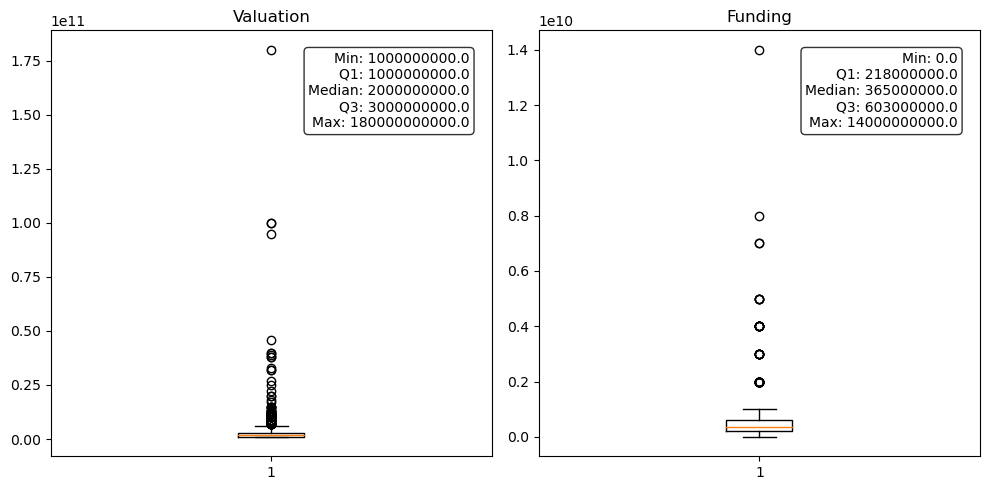

In [61]:
# Checking for Outliers

# The calculation summary statistics of 'Valuation' and 'Funding' columns 
summary = df[['Valuation', 'Funding']].describe().astype(float)

# Create a box plot of the 'Quantity' and 'UnitPrice' columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].boxplot(df['Valuation'])
axs[0].set_title('Valuation')

axs[1].boxplot(df['Funding'])
axs[1].set_title('Funding')

# Add the summary statistics to the box plots
for i, ax in enumerate(axs):
    ax.text(0.95, 0.95, f"Min: {summary.iloc[3,i]}\nQ1: {summary.iloc[4,i]}\nMedian: {summary.iloc[5,i]}\nQ3: {summary.iloc[6,i]}\nMax: {summary.iloc[7,i]}", transform=ax.transAxes, fontsize=10, va='top', ha='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust the spacing between subplots
fig.tight_layout()

# Show the box plot
plt.show()

In [62]:
df.select_dtypes(include=[int, float]).columns

Index(['Valuation', 'Year Founded', 'Funding'], dtype='object')

In [63]:
df.describe(include=['object']).columns

Index(['Company', 'Industry', 'City', 'Country', 'Continent',
       'Select Investors'],
      dtype='object')

In [64]:
df.describe(include=['object'])

,Company,Industry,City,Country,Continent,Select Investors
count,1074,1074,1074,1074,1074,1074
unique,1073,15,257,46,6,1059
top,Bolt,Fintech,San Francisco,United States,North America,Sequoia Capital
freq,2,224,152,562,589,3


In [65]:
new_size = df.groupby(['Continent', 'Country']).size()
new_size

Continent      Country             
Africa         Nigeria                   1
               Senegal                   1
               South Africa              1
Asia           China                   173
               Hong Kong                 6
               India                    65
               Indonesia                 6
               Israel                   20
               Japan                     5
               Malaysia                  1
               Philippines               2
               Singapore                12
               South Africa              1
               South Korea              12
               Thailand                  2
               United Arab Emirates      3
               Vietnam                   2
Europe         Austria                   2
               Belgium                   3
               Croatia                   1
               Czech Republic            1
               Denmark                   2
               Est

In [66]:
df.Continent.unique()

array(['Asia', 'North America', 'Europe', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [67]:
df.Country.unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Turkey', 'Estonia', 'Germany',
       'Hong Kong', 'South Korea', 'Mexico', 'Canada', 'Netherlands',
       'France', 'Finland', 'Israel', 'Lithuania', 'Denmark', 'Belgium',
       'Colombia', 'Brazil', 'Singapore', 'Austria', 'Ireland',
       'United Arab Emirates', 'Switzerland', 'Vietnam', 'South Africa',
       'Thailand', 'Norway', 'Chile', 'Argentina', 'Bermuda', 'Japan',
       'Spain', 'Malaysia', 'Senegal', 'Philippines', 'Luxembourg',
       'Nigeria', 'Czech Republic', 'Croatia', 'Italy'], dtype=object)

In [68]:
df.City.unique()

array(['Beijing', 'Hawthorne', 'Shenzhen', 'San Francisco', 'Stockholm',
       'Surry Hills', 'London', 'Cary', 'Unknown', 'Jacksonville',
       'Bengaluru', 'Jakarta', 'Shanghai', 'Philadelphia', 'Waltham',
       'New York', 'Pittsburgh', 'Istanbul', 'San Diego', 'Roseville',
       'Changsha', 'Tallinn', 'Luohe', 'Munich', 'Gurugram', 'Boston',
       'Glendale', 'Cheung Sha Wan', 'Walpole', 'Seoul', 'Fremont',
       'Mountain View', 'Lerma de Villada', 'Berlin', 'Kirkland',
       'Mumbai', 'Santa Clara', 'Vancouver', 'San Jose', 'San Mateo',
       'Irving', 'Chicago', 'Redwood City', 'Hoboken', 'Palo Alto',
       'Toronto', 'Los Angeles', 'Hangzhou', 'Changzhou', 'Melbourne',
       'Amsterdam', 'Paris', 'Oakland', 'Brooklyn', 'Helsinki',
       'Burlingame', 'Tel Aviv', 'Zhuhai', 'Guangzhou', 'Vilnius',
       'Irvine', 'Copenhagen', 'Brussels', 'Bogota', 'Sao Paulo',
       'Atlanta', 'Campinas', 'Montreal', 'Bellevue', 'Gurgaon', 'Noida',
       'Suzhou', 'El Segundo', 'Fa

In [69]:
df.Industry.unique()

array(['Artificial Intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications'], dtype=object)

### KEY PERFORMANCE INDICATORS (KPI)

In [70]:
# Total Valuation of Unicorn Companies
valuation_sum = df['Valuation'].sum()
new_valuation = '${:,.3f}.T'.format(valuation_sum/ 10**12)
new_valuation

'$3.711.T'

In [71]:
# Total Number of Unicorn Companies
companies = df.Company.nunique() - -1
companies

1074

In [72]:
# Total Number of Unicorn Industries
industries = df.Industry.nunique()
industries

15

In [73]:
# Total Number of Unicorn Continents
continents = df.Continent.nunique()
continents

6

In [74]:
# Total No of Unicorn Countries
countries = df.Country.nunique()
countries

46

In [75]:
# Total Number of Unicorn Cities
cities = df.City.nunique()
cities

257

In [76]:
# Total Amount Received by Unicorn Companies
funding_sum = df['Funding'].sum()
new_funding = '${:,.3f}.B'.format(funding_sum/ 10**9)
new_funding

'$591.820.B'

In [77]:
# Total Valuation of Unicorn Companies
valuation_sum = df['Valuation'].sum()
new_valuation = '${:,.3f}.T'.format(valuation_sum/ 10**12)
# Total Number of Unicorn Companies
companies = df.Company.nunique() - -1
# Total Number of Unicorn Industries
industries = df.Industry.nunique()
# Total Number of Unicorn Continents
continents = df.Continent.nunique()
# Total No of Unicorn Countries
countries = df.Country.nunique()
# Total Number of Unicorn Cities
cities = df.City.nunique()
# Total Amount Received by Unicorn Companies
funding_sum = df['Funding'].sum()
new_funding = '${:,.3f}.B'.format(funding_sum/ 10**9)

# Print Functions
print('The Total Valuation of Unicorns is: ', new_valuation)
print('The Total No. of Unicorn Companies is: ', companies)
print('The Total No. of Unicorn Industries is: ', industries)
print('The Total No. of Unicorn Continents is: ', continents)
print('The Total No. of Unicorn Countries is: ', countries)
print('The Total No. of Unicorn Cities is: ', cities)
print('The Total Funding received by Unicorns is: ', new_funding)

The Total Valuation of Unicorns is:  $3.711.T
The Total No. of Unicorn Companies is:  1074
The Total No. of Unicorn Industries is:  15
The Total No. of Unicorn Continents is:  6
The Total No. of Unicorn Countries is:  46
The Total No. of Unicorn Cities is:  257
The Total Funding received by Unicorns is:  $591.820.B


### OBSERVATIONS AND VISUALIZATION

### UNIVARIATE ANALYSIS

In [78]:
# The Decriptive Statistics of the Numerical Columns

int_columns = df['Year Founded'].describe().astype(int)
float_columns = df[['Valuation','Funding']].describe().astype(float)

# Concatenate/ join the'Year Funded' to show as int, and 'Valuation' and 'Funding' to show as float                                                        
joined_columns = pd.concat([float_columns, int_columns], axis= 1)
joined_columns

,Valuation,Funding,Year Founded
count,1.074000e+03,1.074000e+03,1074
mean,3.455307e+09,5.510428e+08,2012
std,8.547022e+09,8.077194e+08,5
min,1.000000e+09,0.000000e+00,1919
25%,1.000000e+09,2.180000e+08,2011
50%,2.000000e+09,3.650000e+08,2014
75%,3.000000e+09,6.030000e+08,2016
max,1.800000e+11,1.400000e+10,2021


#### Observation and Summary:

**Valuation:**

The dataset includes information on the valuation of 1074 unicorn companies. The mean valuation of these companies is approximately 3.46 billion USD, indicating that, on average, unicorn companies are valued quite high in the market. The standard deviation of valuations is relatively large, indicating significant variability in the valuations of different companies. The minimum valuation observed is 1 billion USD, which is the threshold for achieving unicorn status. The maximum valuation in the dataset is an impressive 180 billion USD, showcasing the immense value some unicorn companies have accrued. The interquartile range (IQR) of valuations spans from 1 billion USD to 3 billion USD, indicating that most companies fall within this range, with some outliers having much higher valuations.

**Funding:**

The dataset also provides information on the funding received by each unicorn company. The mean funding raised by these companies is approximately 551 million USD, highlighting the substantial investment capital these companies have attracted. The standard deviation of funding amounts is relatively high, indicating significant variability in the amounts of funding raised by different companies. The minimum funding amount observed is 0 USD, suggesting that some companies may not have raised any external funding. The maximum funding amount in the dataset is 14 billion USD, indicating the substantial financial backing received by some unicorn companies. The IQR of funding amounts spans from 218 million USD to 603 million USD, indicating that most companies fall within this range, with some outliers having received much larger amounts of funding.

**Year Founded:**

The dataset includes the year in which each unicorn company was founded. The mean year of founding for these companies is approximately 2012, suggesting that many unicorn companies are relatively young, having been founded in the past decade. The standard deviation of founding years is 5 years, indicating some variability in the ages of unicorn companies. The earliest founding year observed is 1919, indicating that some unicorn companies have been around for over a century. The most recent founding year observed is 2021, indicating that new unicorn companies continue to emerge even in the present year. The majority of unicorn companies in the dataset were founded between 2011 and 2016, as indicated by the interquartile range.

In summary, the descriptive statistics provide valuable insights into the characteristics of unicorn companies, including their valuations, funding amounts, and founding years. Overall, the data suggests that unicorn companies are highly valued, attract significant investment capital, and are relatively young, with many having been founded in the past decade. However, there is also significant variability among unicorn companies, with some outliers having exceptionally high valuations and funding amounts.


### BIVARIATE ANALYSIS

In [79]:
# Bivariate
# The Top 10 Most Valued Companies
top10_companies = df.groupby('Company')['Valuation'].sum().sort_values(ascending= False).head(10).reset_index(name= 'Valuation')
top10_companies

,Company,Valuation
0,Bytedance,1.800000e+11
1,SpaceX,1.000000e+11
2,SHEIN,1.000000e+11
3,Stripe,9.500000e+10
4,Klarna,4.600000e+10
5,Checkout.com,4.000000e+10
6,Canva,4.000000e+10
7,Instacart,3.900000e+10
8,JUUL Labs,3.800000e+10
9,Databricks,3.800000e+10


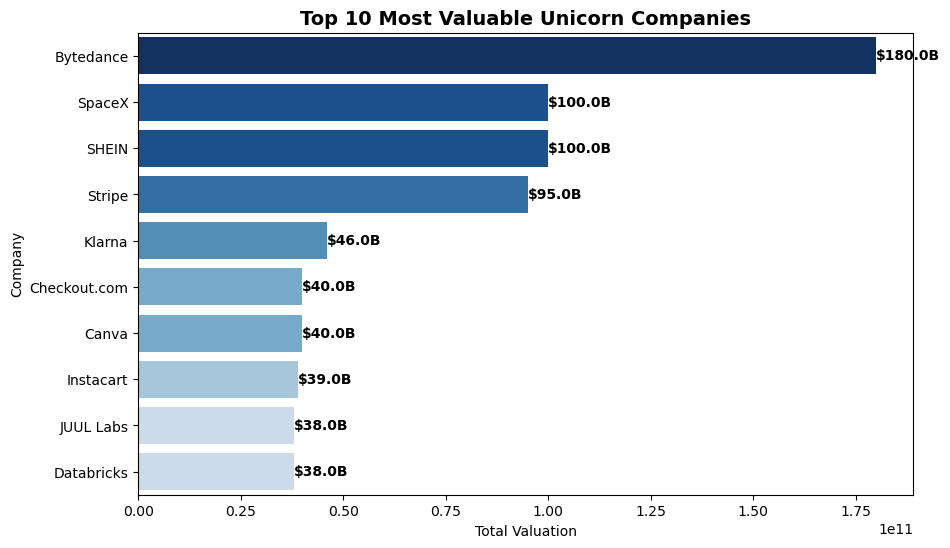

In [80]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the horizontal barplot with a custom color palette
sns.barplot(x="Valuation", y="Company", data=top10_companies, palette=['#08306b', '#08519c', '#08519c', '#2171b5',  '#4292c6', '#6baed6', '#6baed6', '#9ecae1', '#c6dbef', '#c6dbef'], ax=ax)

# Add 'Valuation' labels to the bars
for index, row in top10_companies.iterrows():
    valuation = row["Valuation"]
    if valuation >= 1e9:
        label = f"${valuation/1e9:.1f}B"
    else:
        label = f"${valuation/1e6:.1f}M"
    ax.text(valuation, index, label, ha="left", va="center", fontsize=10, color="black", fontweight= 'bold')

# Customize the plot
ax.set(xlabel="Total Valuation", ylabel="Company")
plt.title("Top 10 Most Valuable Unicorn Companies", fontsize=14, fontweight= 'bold')
plt.xticks(rotation=0)

plt.show()



### Top 10 Most Valued Companies
### Observations

**Title: "Unveiling the Unicorn Leaders: A Glimpse into the Top 10 Most Valuable Companies"**

**Introduction:**
    
In the dynamic landscape of modern business, a select group of companies stands out as unicorns—private startups valued at over $1 billion. Our exploration delves into the top 10 most valuable unicorn companies, unraveling their staggering valuations.

**Visualization:**
    
The horizontal bar plot showcases the total valuation of these industry giants. Each bar represents a company, and the length of the bar corresponds to its valuation. Let's embark on a journey to uncover the stories behind these impressive figures.

**Key Insights:**

**Leading the Pack:**

Topping the charts is Bytedance, with a valuation of the $180B. This behemoth has secured its place as the unrivaled leader among unicorns.

**Tech Titans Dominate:**

The majority of the top 10 unicorns hail from the tech sector. SpaceX, Shein, Strip, and Klarna are not only pioneers but also key players in shaping the future of technology.

**Economic Impact:**

The cumulative valuation of these top 10 companies transcends mere financial metrics. It signifies a substantial economic impact, contributing billions to the overall valuation of the unicorn ecosystem.

**Unveiling Disparities:**

While Checkout.com and Canva share similar valuations, a closer look reveals nuances in their respective industries and business models. The competition among these closely valued companies could shape industry dynamics in the coming years.

**Financial Magnitude:**

The scale of these valuations is mind-boggling. Noteworthy is the use of the 'Billion' and 'Million' scale for clarity in understanding the sheer financial magnitude of these unicorns.

**Conclusion:**
    
The top 10 most valuable unicorn companies not only represent financial success but are also emblematic of innovation, disruption, and the evolving nature of the business world. As we navigate the future, these companies are likely to continue influencing industries and shaping the global economic landscape.



In [81]:
# The Top 8 Companies With The Highest Funding
top8_companyF = df.groupby('Company')['Funding'].sum().sort_values(ascending= False).head(8)
top8_companyF

Company
JUUL Labs             1.400000e+10
Bytedance             8.000000e+09
Epic Games            7.000000e+09
SpaceX                7.000000e+09
Global Switch         5.000000e+09
Xingsheng Selected    5.000000e+09
Swiggy                5.000000e+09
J&T Express           5.000000e+09
Name: Funding, dtype: float64

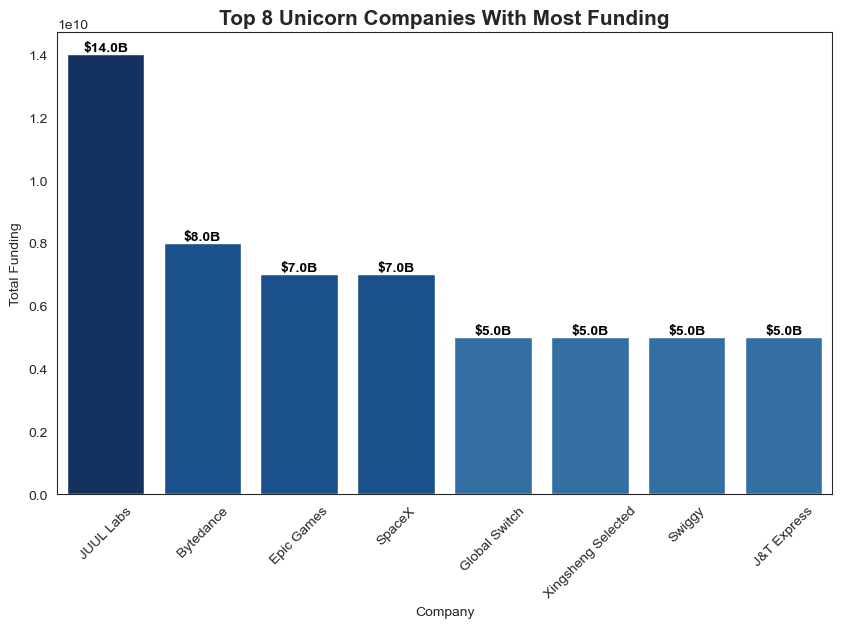

In [82]:
# Create a vertical barplot showing the top 8 companies that with the highest funding

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.set_style("white")

# Create a custom sequential color palette using seaborn
custom_palette = ['#08306b', '#08519c', '#08519c', '#08519c', '#2171b5', '#2171b5', '#2171b5', '#2171b5', '#6baed6', '#6baed6']

# Create the barplot with explicit palette setting
ax = sns.barplot(x=top8_companyF.index, y=top8_companyF, palette=custom_palette)

# Add 'Total Funding' labels to the bars with custom formatting
for index, value in enumerate(top8_companyF):
    if value >= 1e9:
        label = f"${value/1e9:.1f}B"
    else:
        label = f"${value/1e6:.1f}M"
    ax.text(index, value, label, ha="center", va="bottom", fontsize=10, color="black", fontweight='bold')

# Customize the plot
ax.set(xlabel="Company", ylabel="Total Funding")
plt.title("Top 8 Unicorn Companies With Most Funding", fontsize=15, fontweight='bold')
plt.xticks(rotation=45)

plt.show()


### Top 8 Companies With The Highest Funding
### Observation

**Title: "Capital Heights: Unveiling the Power Players in Unicorn Funding"**

**Introduction:**
    
In the ever-evolving landscape of unicorns, where innovation and funding intertwine, we explore the top echelon of companies that have soared to unprecedented heights in terms of financial backing. Our journey takes us through the vertical bars of funding, where each ascent signifies a monumental investment.

**Visualization:**
    
The vertical bar plot before us is a symphony of color, portraying the financial might of the top 8 unicorn companies. Each bar represents a company, and its height is a testament to the colossal funding it has garnered. Let's unravel the narrative behind these towering pillars of capital.

**Key Insights:**

**Financial Titans:**
    
At the zenith of the funding mountain stands Juul Labs, a behemoth that has attracted a staggering investment, dwarfing its peers. The magnitude of its funding underscores its strategic importance in the unicorn realm.

**Diversity in Sectors:**
    
The top 8 is a diverse tapestry, woven with companies from various sectors - Bytedance and Epic Games from tech, Space X in the Others category, and others. This diversity signifies the broad spectrum of industries capturing the imagination of investors.

**Strategic Investments:**
    
Global Switch and Xingstheng Selected, although sharing a similar funding plateau, diverge in their strategic approaches. A closer look reveals nuanced patterns, suggesting distinct paths in utilizing their financial prowess.

**Billion-Dollar Canvas:**
    
The 'Billion' tag on the funding scale is not just a metric; it is a testament to the immense financial weight these companies carry. Their funding, measured in billions, echoes the magnitude of the bets placed on their potential.

**Visual Impact:**
    
The color palette, carefully curated for visual impact, serves as a visual cue to the financial prowess of each company. From deep blue to azure, it mirrors the transition from substantial to extraordinary funding.

**Conclusion:**
    
    
The vertical bars before us are not just a visualization; they are a testament to the trust and belief investors have placed in these unicorn companies. As we navigate this landscape, it becomes evident that the funding prowess of these companies is not just a number; it is a reflection of their journey, potential, and impact on the business world.



In [83]:
# The Top 5 Unicorn Industries by Valuation
top5_industries = df.groupby('Industry')['Valuation'].sum().sort_values(ascending= False).head().reset_index(name= 'Valuation')
top5_industries

,Industry,Valuation
0,Fintech,8.820000e+11
1,Internet software & services,5.950000e+11
2,E-commerce & direct-to-consumer,4.260000e+11
3,Artificial Intelligence,3.770000e+11
4,Other,2.520000e+11


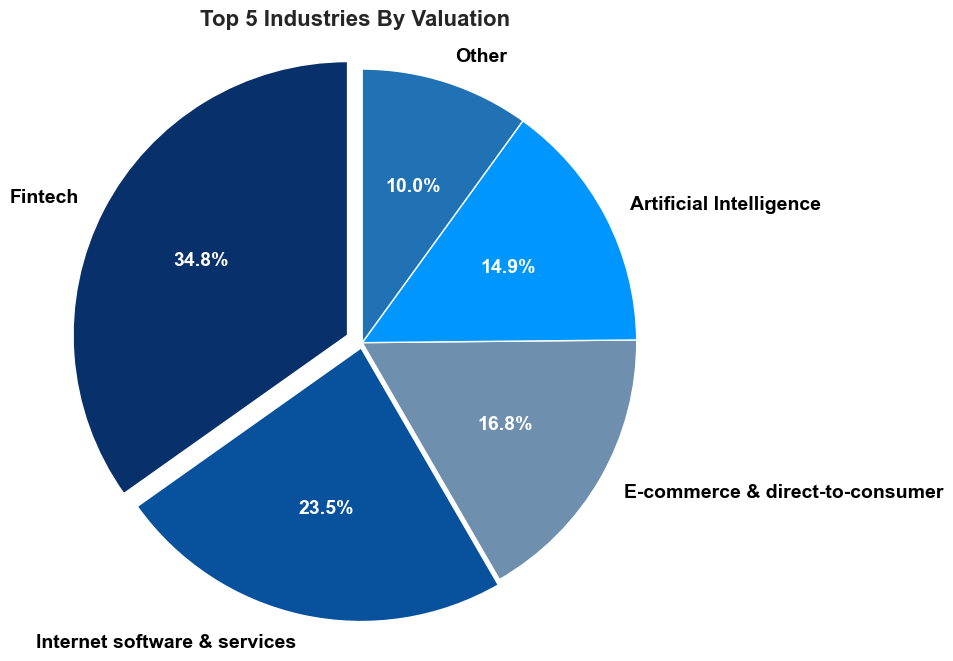

In [84]:
# Create a pie chart to show the 5 Unicorn Industries with the highest valuation

# Extract the data for the pie chart
industries = top5_industries['Industry']
valuation = top5_industries['Valuation']
colors = ['#08306b', '#08519c', '#6F8FAF', '#0096FF', '#2171b5']

# Define explode (to highlight a slice)
explode = (0.06, 0.02, 0, 0, 0)  # You can adjust the explosion for the slice you want to highlight

# Create the pie chart with industry names as labels
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
pie, texts, autotexts = plt.pie(valuation, labels=industries, colors= colors, explode=explode, autopct='%1.1f%%', startangle=90)
    
# Customize the label colors
for text, autotext in zip(texts, autotexts):
    text.set(color='black', fontsize=14, fontweight='bold')
    autotext.set(color='white', fontsize=14, fontweight='bold')
    
# Add a title
plt.title('Top 5 Industries By Valuation', fontsize=16, fontweight='bold')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


### The 5 Industries with The Highest Valuation
### Observation

**Title: "Industries Unveiled: A Slice of Unicorn Valuation"**

**Introduction:**
    
In the vast expanse of unicorn companies, certain industries emerge as titans, commanding attention and valuation. Our exploration delves into the pie chart, a visual feast that slices through the data to reveal the dominance of the top 5 industries in the unicorn realm.

**Visualization:**
    
Before us is a kaleidoscope of colors, each slice representing a unique industry's share of the total unicorn valuation. As we journey through this pie chart, we uncover the nuances and dynamics that shape the valuation landscape.

**Key Insights:**

**Tech Titans Reign:**

The deep blue slice, representing the technology sector, looms large. Its dominance echoes the transformative power of tech unicorns, shaping the future of innovation and business.

**Internet Software & Services​ in the Spotlight:**

The rich navy blue and azure slices signify the Internet Software & Services​ sector's strong presence. Fintech unicorns carve out a significant portion, highlighting the industry's pivotal role in the unicorn ecosystem.

**E-Commerce & Direct-to-consumer Rising:**

The tranquil blue slice, belonging to the E-Commerce & Direct-to-consumer industry, showcases a steady ascent. E-Commerce & Direct-to-consumer unicorns, with their commitment to innovation, are becoming increasingly influential in the unicorn landscape.

**Diversity in Colors, Diversity in Industries:**

The vibrant colors don't just create a visually appealing chart; they represent the diversity of industries contributing to the unicorn valuation. From Fintech to Artificial Intelligence, each color tells a unique story.

**Highlighting the Slice:**

The deliberate explosion of the Fintech slice draws attention to its significance. It's not just a slice; it's a cornerstone, a powerhouse that defines the unicorn narrative.

**Visual Symphony:**

The contrast in label colors enhances readability and draws attention to the intricate details of the chart. Black against the vibrant backdrop provides a clear and crisp view of the industries at play.

**Conclusion:**
    
    
As the pie chart settles into its circular form, it encapsulates more than just data points; it encapsulates the spirit of innovation, the dynamism of industries, and the collective impact of unicorns. The top 5 industries, each contributing a unique flavor, collectively compose the symphony of the unicorn valuation landscape.



In [85]:
# The Top 5 Countries with the Most Number of Unicorns
top5_countries = df.groupby('Country')['Company'].size().sort_values(ascending= False).head()
top5_countries

Country
United States     562
China             173
India              65
United Kingdom     43
Germany            26
Name: Company, dtype: int64

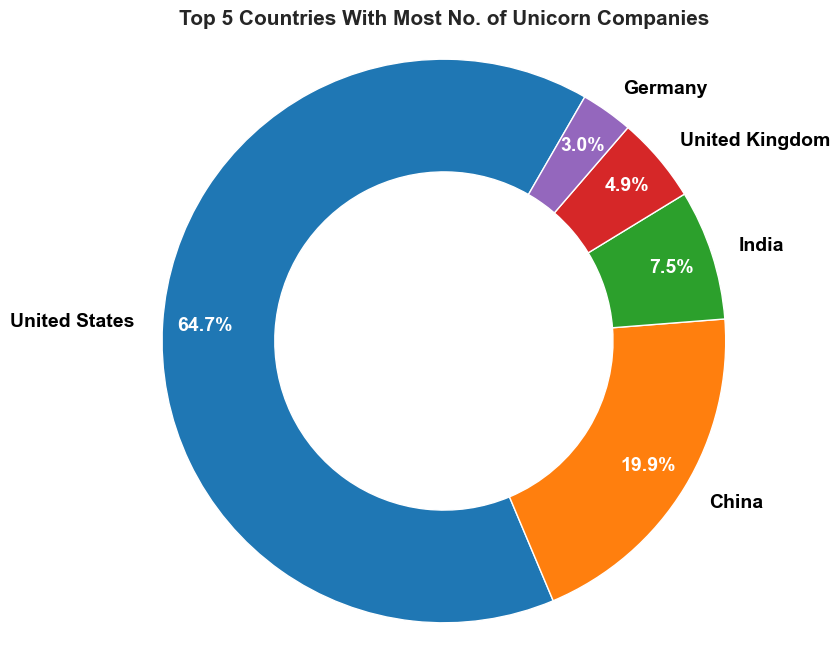

In [86]:
# Use a pie chart to visualize the top 5 Countries with the highest number of Unicorn Companies

# Extract the data for the doughnut pie chart
countries = top5_countries.index
company_counts = top5_countries.values

# Create the doughnut pie chart with percentage labels inside and black labels outside
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed


wedges, texts, autotexts = plt.pie(
    company_counts,
    labels=countries,
    autopct='%1.1f%%',
    pctdistance=0.85,  # Adjust the percentage label position inside the pie
    wedgeprops={'width': 0.4},  # Control the width of the doughnut hole
    startangle=60,
)

# Customize the labels inside and outside the doughnut pie
for text, autotext in zip(texts, autotexts):
    text.set(color='black', fontsize=14, fontweight='bold')
    autotext.set(color='white', fontsize=14, fontweight='bold')

# Add a title
plt.title('Top 5 Countries With Most No. of Unicorn Companies', fontsize=15, fontweight='bold')

# Display the doughnut pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### The Top 5 Countries With The Highest Number of Unicorns
### Observation

**Title: "Global Unicorn Playground: A Doughnut of Entrepreneurship"**

**Introduction:**
    
In the ever-expanding universe of unicorns, geographical boundaries dissolve as innovation becomes a global endeavor. Our exploration today takes the form of a doughnut pie chart, revealing the distribution of unicorn companies across different countries. As we indulge in this visual treat, we uncover the global dynamics of unicorn entrepreneurship.

**Visualization:**
    
Before us, a delectable doughnut pie chart serves as a canvas, with each slice representing the unicorn landscape of a specific country. The inner percentages whisper tales of concentration, while the outer labels shout the names of countries that house the unicorns. Let's delve into this doughnut of entrepreneurship.

**Key Insights:**

**United States Dominance:**

The expansive wedge of the United States dominates the doughnut, illustrating the country's unrivaled contribution to the unicorn ecosystem. Silicon Valley's glow is palpable, as it hosts a myriad of groundbreaking startups.

**China's Rising Influence:**

The substantial slice attributed to China mirrors the country's meteoric rise in the global unicorn race. Chinese innovation hubs, fueled by a dynamic market, are fostering the growth of numerous unicorns.

**Asia-Pacific Flourishing:""

A blend of colors representing countries in the Asia-Pacific region signifies a flourishing entrepreneurial scene. Unicorns in India, Singapore, and other nations contribute to the vibrancy of this global doughnut.
Percentage Whispers:

**Europe's Mosaic of Unicorns:**

The diverse segments of the European wedge portray a mosaic of unicorn activity across the continent. From the UK to Germany, European countries are carving their niche in the entrepreneurial landscape.


The placement of percentage labels inside the doughnut adds a layer of subtlety. It whispers concentration, emphasizing the dominance of certain countries while leaving room for others to emerge.

**Visual Harmony:**

The contrasting label colors, with black on the outer ring and white on the inner percentage labels, create a visual harmony that enhances readability and draws attention to the interplay of countries.

**Conclusion:**
    
As the doughnut settles into a perfect circle, it encapsulates not just numerical data but the spirit of global collaboration in innovation. The top 5 countries, each contributing a unique flavor to the entrepreneurial doughnut, collectively shape the narrative of the ever-evolving unicorn ecosystem on a global scale.



In [87]:
# The Top 5 Cities with the higest number of Unicorn Companies
top5_cities = df.groupby(['City'])['Company'].size().sort_values(ascending=False).head(5)
top5_cities

City
San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
Name: Company, dtype: int64

<Figure size 1000x600 with 0 Axes>

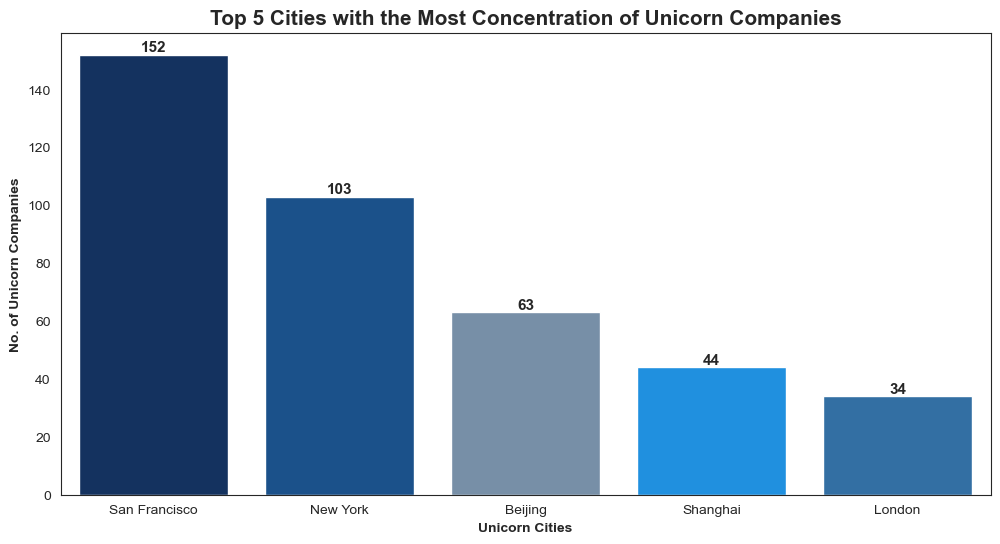

In [88]:
# Create a horizontal barplot to show the Top 10 Cities with the highest concentration of Unicorn Companies 
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.set_style("white")
custom_palette = sns.color_palette = ['#08306b', '#08519c', '#6F8FAF', '#0096FF', '#2171b5']

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Company', data=top5_cities.reset_index(), palette= custom_palette, dodge=False)

# Add labels for the number of cities for each bar
for i in range(len(top5_cities)):
    plt.text(x=i, y=top5_cities.iloc[i]+1, s=top5_cities.iloc[i], ha='center', fontsize=11, fontweight= 'bold')

plt.title('Top 5 Cities with the Most Concentration of Unicorn Companies', fontsize=15, fontweight='bold')
plt.xlabel('Unicorn Cities', fontsize=10, fontweight= 'bold')
plt.ylabel('No. of Unicorn Companies', fontsize=10, fontweight= 'bold')

plt.show()

### Top 5 Cities With The Highest Number of Unicorn Companies
### Observation

**Title: "City Skylines: Navigating the Unicorn Capitals"**

**Introduction:**
    
In the bustling tapestry of global innovation, certain cities emerge as epicenters, hosting a vibrant concentration of unicorn companies that redefine the business landscape. Today, our exploration unfolds through a horizontal bar plot, casting a spotlight on the top cities that serve as incubators for these mythical startups.

**Visualization:**
    
Before us, a cityscape of bars rises, each silhouette representing a city's prowess in nurturing unicorn companies. The heights of these bars tell a story of economic vitality and innovation, and the hues speak of the unique character of each city. Let's embark on a journey through these urban landscapes and unravel the tales etched in this bar plot.

**Key Insights:**

**Silicon Valley's Resilience:**

Towering above the rest, the deep blue bar of Silicon Valley reaffirms its status as the undisputed unicorn capital. This technological behemoth continues to be a magnetic force for startups and investors alike.

**New York's Financial Might:**

The bold presence of New York's bar, adorned in a shade of royal blue, signifies its significant role in the unicorn ecosystem. As the financial heartbeat of the world, the city stands tall as a haven for unicorn companies seeking global prominence.

**China's Twin Peaks:**

The azure peaks of Beijing and Shanghai form a formidable skyline, underlining China's rise as a global innovation hub. These twin cities echo the dynamism and ambition propelling the nation's unicorn ecosystem.

**European Elegance:**

Amidst the muted blue bars of London, we find a fusion of tradition and innovation. This European city, with its rich cultural heritage, is carving a niche in the unicorn narrative.

**Numeric Narratives:**

Numeric annotations atop each bar provide a tangible dimension to the visual spectacle. Beyond the aesthetics, the numbers articulate the sheer concentration of unicorn companies, hinting at the competitive pulse of each city.

**Palette of Possibilities:**

The carefully curated color palette adds a layer of sophistication to the visual narrative. From the deep blues symbolizing tech prowess to the vibrant hues reflecting cultural diversity, each color paints a different facet of the unicorn story.

**Dynamic Intersections:**

The decision to dodge the bars creates a sense of continuity, emphasizing the interconnectedness of these cities. It's not just a collection of individual skylines; it's a dynamic intersection of global innovation hubs.

**Conclusion:**
    
    
As the city skylines settle into a harmonious visual tapestry, we recognize more than just bars on a plot; we recognize the beating heart of innovation. The top 5 cities, standing tall in their uniqueness, contribute to the ever-evolving narrative of unicorn companies and their chosen urban landscapes.



In [89]:
# Unicorn Companies Distribution Across Continent
unicorn_cont = df.groupby('Continent')['Company'].size().sort_values(ascending= False).head(10)
unicorn_cont

Continent
North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: Company, dtype: int64

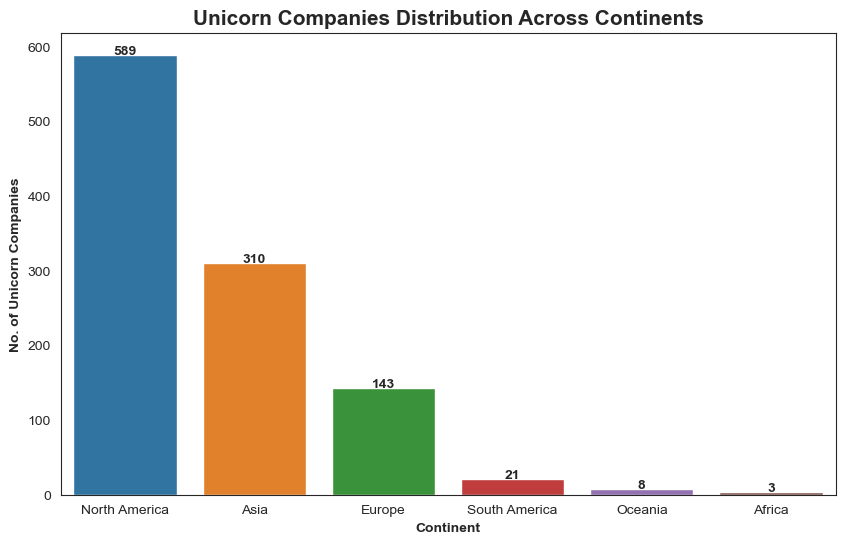

In [90]:
unicorn_cont = df.groupby('Continent')['Company'].size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=df, order=unicorn_cont.index)
plt.title('Unicorn Companies Distribution Across Continents',fontsize=15, fontweight= 'bold')
plt.xlabel('Continent', fontsize=10, fontweight= 'bold')
plt.ylabel('No. of Unicorn Companies', fontsize=10, fontweight= 'bold')

# Add labels for the number of companies for each bar
for i in range(len(unicorn_cont)):
    plt.text(x=i, y=unicorn_cont.iloc[i]+1, s=unicorn_cont.iloc[i], ha='center', fontsize=10, fontweight= 'bold')

plt.show()

### Unicorn Companies Distribution Across Continents
### Observation

**Title: "Continental Unicorns: A Global Symphony of Innovation"**

**Introduction:**
    
In the ever-expanding landscape of unicorn companies, the geographical spread across continents unveils a global symphony of innovation. Today, our exploration takes the form of a bar plot, showcasing the distribution of unicorn companies across the world's continents. Each bar represents not just a numeric count but a node in the interconnected web of global entrepreneurship.

**Visualization:**
    
Before us, a series of bars rises, each bearing the name of a continent and reflecting the number of unicorn companies it hosts. The heights of these bars tell a story of innovation and economic dynamism, echoing across continents. Let's traverse this visual landscape and decipher the tales woven into this bar plot.

**Key Insights:**

**North America's Dominance:**

The towering bar representing North America underscores the region's unrivaled position in nurturing unicorn companies. Silicon Valley's aura extends beyond borders, casting a long shadow on the global unicorn landscape.

**Asia-Pacific's Rising Tide:**

The ascending bars of Asia-Pacific, with notable peaks in China and other tech hubs, signify the region's ascent in the global innovation race. From Beijing's skyline to the bustling tech scenes of Singapore and India, Asia-Pacific is a hotbed of entrepreneurial energy.

**Europe's Cultural Mosaic:**

The diverse bars of Europe, from London's financial district to Berlin's startup hubs, paint a mosaic of cultural richness and technological advancement. European cities continue to carve their niche in the unicorn narrative.

**Latin America's Vibrancy:**

The emerging bar of Latin America reveals a vibrant entrepreneurial scene, with cities like São Paulo and Mexico City contributing to the region's growing presence in the global unicorn ecosystem.

**Oceania's Tech Haven:**

The bar representing Oceania highlights the region's significance in the global tech landscape. With cities like Sydney and Auckland, Oceania contributes to the interconnected tapestry of unicorn innovation.

**African Innovation Rising:**

The burgeoning bar representing Africa showcases the continent's increasing participation in the global innovation arena. Tech hubs in Nairobi, Lagos, and other cities are amplifying Africa's impact on the unicorn narrative.

**Numeric Narratives:**
    
Numeric annotations atop each bar provide a tangible dimension to the visual spectacle. Beyond the aesthetics, the numbers articulate the sheer concentration of unicorn companies, hinting at the competitive pulse of each continent.

**Visual Palette:**

The color palette, with deep blues and vibrant hues, adds a layer of visual richness. Each color reflects the unique character of the continents, creating a harmonious blend that mirrors the diversity in innovation.

**Interconnected Nodes:**

The bars, standing side by side, symbolize not just individual continents but nodes in a global network of innovation. The visual proximity emphasizes the interconnectedness of continents in shaping the unicorn ecosystem.

**Conclusion:**
    
    
As the continental bars settle into a harmonious visual symphony, we recognize more than just numbers on a plot; we recognize the heartbeat of global entrepreneurship. The continents, each contributing a unique melody, collectively compose the narrative of unicorn companies shaping the future of business on a worldwide scale.


In [91]:
# Unicorn Companies Distribution across Industries
company_spread = df.groupby('Industry')['Company'].size().sort_values(ascending= False).reset_index(name= 'Total Companies')
company_spread

,Industry,Total Companies
0,Fintech,224
1,Internet software & services,205
2,E-commerce & direct-to-consumer,111
3,Artificial Intelligence,84
4,Health,74
5,Other,58
6,"Supply chain, logistics, & delivery",57
7,Cybersecurity,50
8,Data management & analytics,41
9,Mobile & telecommunications,38


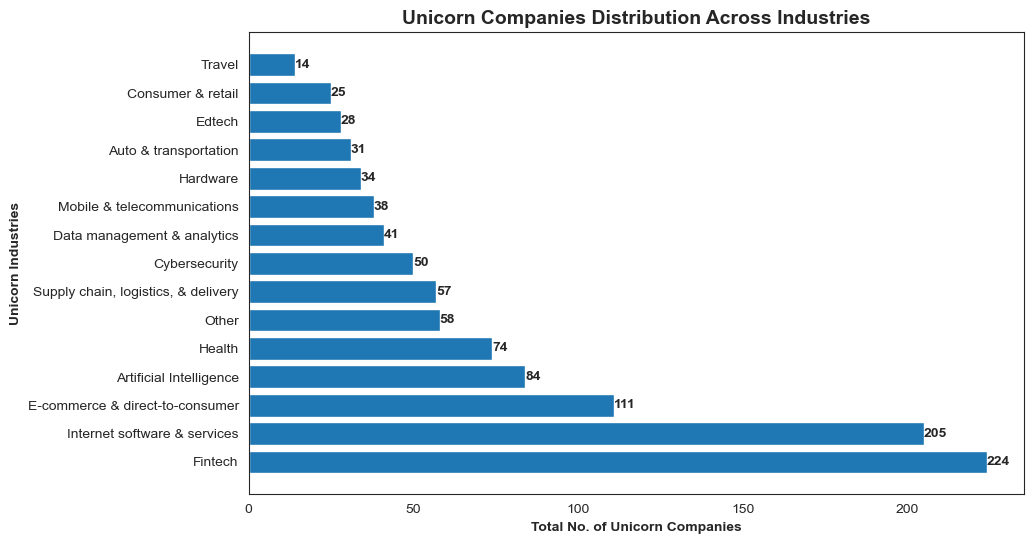

In [92]:
# Unicorn Companies spread across Industries

plt.figure(figsize=(10, 6))
plt.barh(company_spread['Industry'], company_spread['Total Companies'])
plt.title('Unicorn Companies Distribution Across Industries', fontsize=14, fontweight= 'bold')
plt.xlabel('Total No. of Unicorn Companies', fontsize=10, fontweight= 'bold')
plt.ylabel('Unicorn Industries', fontsize=10, fontweight= 'bold')
plt.grid(False)

# Add labels for the number of companies for each industry
for i in range(len(company_spread)):
    plt.text(x=company_spread['Total Companies'][i], y=i, 
             s=company_spread['Total Companies'][i], ha='left', va='center', fontsize=10, fontweight= 'bold')

plt.show()

### Unicorn Companies Distribution Across Industries
### Observation

**Title: "Unicorn Sectors: A Tapestry of Industries"**

**Introduction:**
    
Within the sprawling landscape of unicorn companies, industries serve as the threads weaving a complex tapestry of innovation and economic evolution. Today, our exploration unfolds through a horizontal bar plot, providing a visual narrative of the distribution of unicorn companies across various sectors. Each bar signifies not just a numeric count but the dynamic influence of industries on the global entrepreneurial canvas.

**Visualization:**
    
Before us, a series of horizontal bars stretches, each representing an industry and reflecting the number of unicorn companies within its realm. The lengths of these bars encapsulate stories of growth, disruption, and technological prowess. Let's traverse this visual landscape and decode the tales etched in this bar plot.

**Key Insights:**
    
**Tech Titans in Ascendance:**

The dominating bar of the technology sector stands tall, underscoring its central role in the unicorn narrative. From software to artificial intelligence, technology remains the heartbeat of innovation.    

**Fintech:**

Fintech continues to revolutionize traditional financial services. With a focus on digital payments, lending, insurtech, and blockchain, Fintech unicorns are at the forefront of shaping the future of finance, emphasizing innovation, speed, and user-centric solutions.

**Internet Software & Services:**

The Internet Software & Services sector signifies the backbone of the digital age. Unicorn companies in this sector drive innovation in cloud computing, software as a service (SaaS), and online platforms, playing a crucial role in the digital transformation of businesses.

**E-Commerce and Direct-to-Consumer:**

E-Commerce and Direct-to-Consumer (DTC) unicorns dominate the online retail space, emphasizing a direct connection with consumers. These companies redefine shopping experiences, leveraging technology to create personalized and efficient retail ecosystems.

**Artificial Intelligence:**

The Artificial Intelligence sector represents the cutting edge of technological advancement. Unicorn companies in AI focus on machine learning, natural language processing, and computer vision, shaping industries ranging from healthcare to finance with intelligent solutions.

**Health:**

The Health sector in the unicorn landscape is characterized by innovation in biotechnology, healthtech, and pharmaceuticals. Companies in this sector leverage technology to enhance healthcare delivery, personalized medicine, and medical research.

**Other:**

The "Other" category suggests a diverse range of unicorn companies that may not fit into specific industries mentioned. This diversity underscores the eclectic nature of innovation in the unicorn landscape.

**Supply Chain, Logistics & Delivery:**

Unicorn companies in Supply Chain, Logistics & Delivery leverage technology to optimize the movement of goods. With a focus on efficiency, sustainability, and real-time tracking, these companies play a pivotal role in modernizing the logistics industry.

**Cyber Security:**

In an era of increasing cyber threats, Cyber Security unicorns stand as guardians of digital assets. These companies focus on developing advanced solutions to protect organizations and individuals from cyber-attacks, ensuring data integrity and privacy.

**Data Management & Analytics:**

Unicorn companies in Data Management & Analytics harness the power of big data to provide actionable insights. From business intelligence to data-driven decision-making, these companies contribute to a data-driven revolution across industries.

**Mobile & Telecommunications:**

The Mobile & Telecommunications sector underscores the transformative power of mobile technology. Unicorn companies in this sector drive innovations in mobile communication, 5G, and connectivity, shaping the way people communicate globally.

**Hardware:**

Hardware unicorns focus on developing cutting-edge physical technologies. From consumer electronics to industrial hardware, these companies play a crucial role in advancing the capabilities of devices and infrastructure.

**Auto & Transportation:**

Unicorn companies in Auto & Transportation revolutionize the way people and goods move. With a focus on electric vehicles, autonomous driving, and sustainable transportation solutions, these companies shape the future of mobility.

**Edtech:**

Edtech unicorns drive innovation in education technology. From online learning platforms to adaptive educational tools, these companies cater to the evolving needs of learners, educators, and institutions in a digital age.

**Consumer & Retail:**

Consumer & Retail unicorns redefine the traditional retail landscape. With a focus on consumer engagement, personalized experiences, and omnichannel strategies, these companies shape the future of retail in a digital-first era.

**Travel:**

Unicorn companies in the Travel sector drive innovation in the way people explore the world. With a focus on online travel booking, experience platforms, and sustainable travel solutions, these companies play a pivotal role in shaping the travel industry's future.

**Conclusion:**
    
    
Each industry within the unicorn landscape brings its unique flavor to the table, contributing to a rich tapestry of innovation. From reshaping traditional finance to revolutionizing transportation and education, these industries collectively define the dynamic and interconnected nature of the global unicorn ecosystem.


In [93]:
# The Top 10 Select Investors that have invested the highest funds in Unicorn Companies

def format_funding(funding):
    if funding >= 1000000000:
        return f'${funding/1000000000:.1f}B'
    elif funding >= 1000000:
        return f'${funding/1000000:.1f}M'
    else:
        return f'${funding}'

top10_investors = df.groupby('Select Investors')['Funding'].sum().sort_values(ascending=False).head(10)
top10_investors = top10_investors.apply(format_funding)
top10_investors

Select Investors
Tiger Global Management                                                               $14.0B
Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group                $8.0B
Tencent Holdings, KKR, Smash Ventures                                                  $7.0B
Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures                            $7.0B
Aviation Industry Corporation of China, Essence Financial, Jiangsu Sha Steel Group     $5.0B
Accel India, SAIF Partners, Norwest Venture Partners                                   $5.0B
KKR, Tencent Holdings, Sequoia Capital China                                           $5.0B
Hillhouse Capital Management, Boyu Capital, Sequoia Capital China                      $5.0B
Baidu Capital, Linear Venture, Tencent                                                 $4.0B
Tencent Holdings, Warbug Pincus, IDG Capital                                           $4.0B
Name: Funding, dtype: object

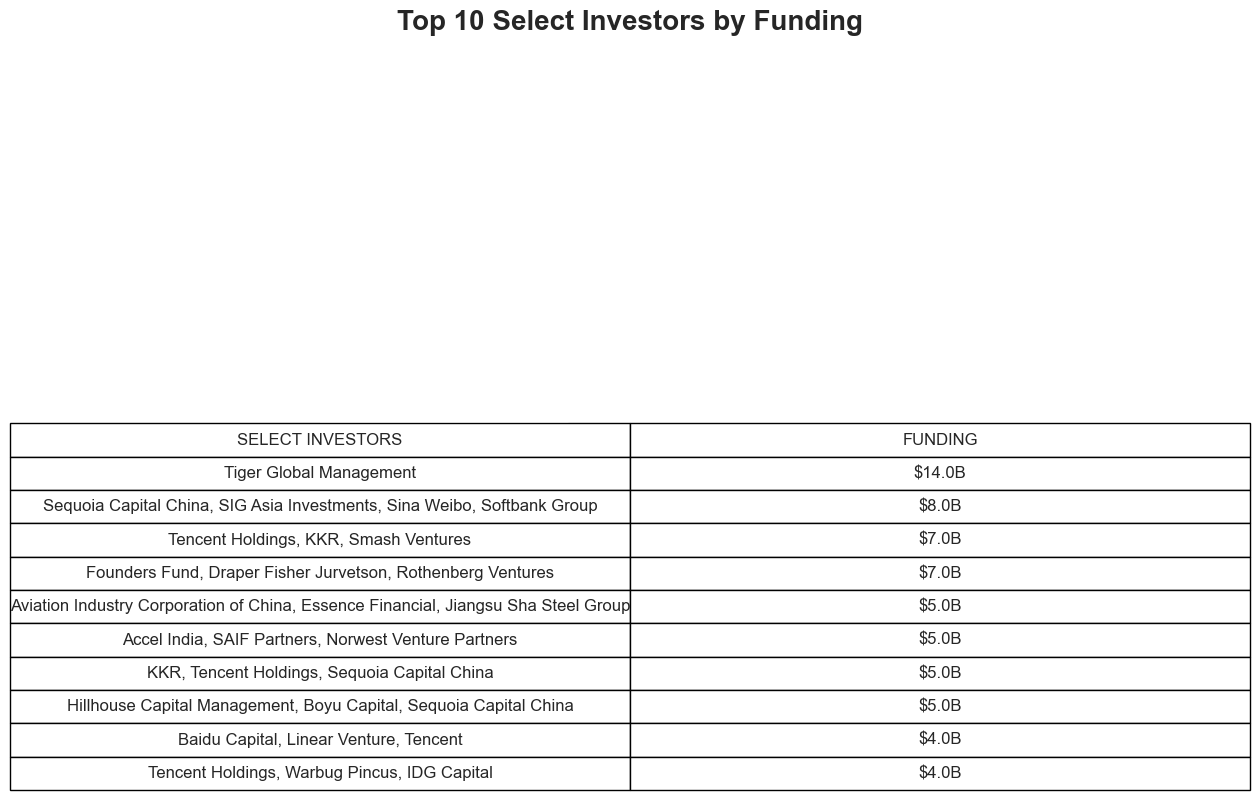

In [94]:
# Create a Bar plot as a Table for Top 10 Select Investors by Funding

def format_funding(funding):
    if funding >= 1000000000:
        return f'${funding/1000000000:.1f}B'
    elif funding >= 1000000:
        return f'${funding/1000000:.1f}M'
    else:
        return f'${funding}'

top10_investors = df.groupby('Select Investors')['Funding'].sum().sort_values(ascending=False).head(10)
top10_investors = top10_investors.apply(format_funding)

# Create a figure and axes for the table-like graph
fig, ax = plt.subplots(figsize=(8, 5))

# Create a bar plot as a table background
ax.axis('off')
ax.bar(0, 0, color='white')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Create a table using the 'table' function
cell_text = []
for label, value in top10_investors.items():
    cell_text.append([label, value])

table = ax.table(cellText=cell_text, cellLoc='center', colLabels=['SELECT INVESTORS', 'FUNDING'])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)  # Adjust the table size
plt.title("Top 10 Select Investors by Funding", fontsize=20, fontweight='bold')

plt.show()

### The Top 10 Select Investors by Funding
### Observation

**Title: "Investor Symphony: Unveiling the Maestros of Unicorn Funding"**

**Introduction:**
    
In the grand orchestration of unicorn funding, certain investors emerge as virtuosos, wielding their financial instruments to compose the symphony of innovation. Each cell in this table resonates with the notes of significant investments, telling a tale of strategic partnerships and visionary support.

**Visualization:**
    
Before us, a table-like bar plot unfurls, its cells filled with the names of select investors and the harmonious cadence of their funding contributions. This visual table captures the essence of funding prowess, turning the traditional bar plot into a concert of financial influence.

**Key Insights:**
    
Tiger Global Management's Dynamic Rhythm:

At the forefront, Tiger Global Management's dynamic rhythm is palpable in the funding crescendo. With a focus on agile and impactful investments, Tiger Global's contributions create a lively beat in the unicorn funding landscape.
Table of Financial Harmony:
    
**Sequoia Capital's Crescendo:**

Sequoia Capital's name stands bold, reflecting its pivotal role in shaping the unicorn landscape. With strategic investments in groundbreaking ventures, Sequoia's funding symphony echoes across industries.

**Accel's Melody of Support:**

Accel takes its place as a key player in the funding orchestra. Its investments harmonize with innovation, supporting unicorns across diverse sectors with a melody of financial backing.

**SoftBank's Global Overture:**

The global overture by SoftBank resonates through the table. As a visionary investor with a penchant for transformative funding, SoftBank's presence spans continents, contributing to the global reach of unicorn companies.

**Benchmark's Precision Notes:**

Benchmark's precise notes on the funding scale underscore its strategic investments. With an eye for promising ventures, Benchmark's contributions add a layer of sophistication to the funding symphony.

The table serves as a visual score, each cell a note in the grand composition of unicorn funding. The 'SELECT INVESTORS' column unveils the orchestrators, while the 'FUNDING' column quantifies the financial resonance of each investor.

**Conclusion:**
    
    
As the investor symphony plays out in this unique bar plot, we witness not just financial transactions but a collaborative masterpiece of visionary support. The top 10 select investors, immortalized in this table, contribute to the crescendo of unicorn success, illustrating that behind every groundbreaking startup, there is a melody of strategic funding.

In [95]:
# The Top 10 Countries with the Most Select Investors
top10_investors = df.groupby(['Country'])['Select Investors'].size().sort_values(ascending= False).head(10)
top10_investors

Country
United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
South Korea        12
Name: Select Investors, dtype: int64

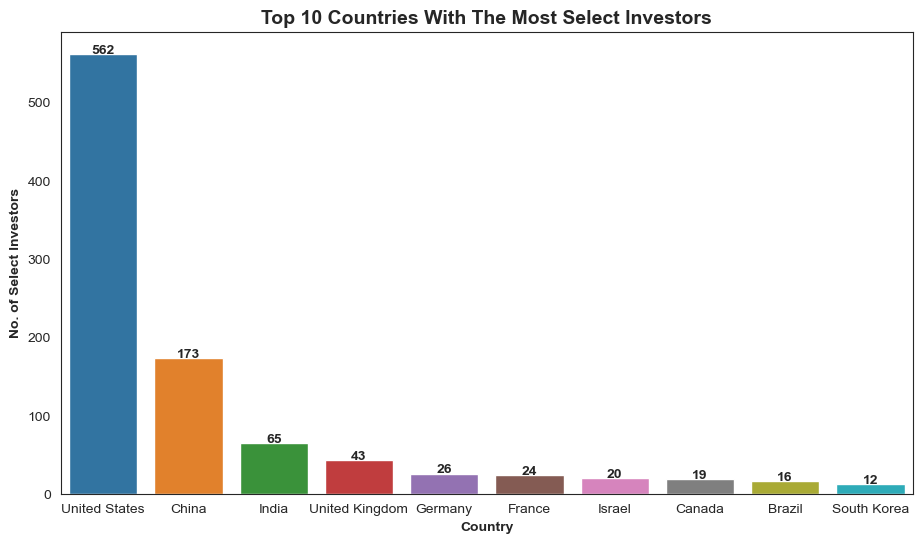

In [96]:
# Create a Bar plot for the Top 10 Countries with the most Select Investors

top10_investors = df.groupby('Country')['Select Investors'].size().sort_values(ascending=False).head(10)

plt.figure(figsize=(11, 6))
sns.countplot(x='Country', data=df, order=top10_investors.index)
plt.title('Top 10 Countries With The Most Select Investors', fontsize=14, fontweight= 'bold')
plt.xlabel('Country', fontsize=10, fontweight= 'bold')
plt.ylabel('No. of Select Investors', fontsize=10, fontweight= 'bold')

# Add labels for the number of companies for each bar
for i in range(len(top10_investors)):
    plt.text(x=i, y=top10_investors.iloc[i]+1, s=top10_investors.iloc[i], ha='center', fontsize=10, fontweight= 'bold')

plt.show()

### 10 Countries With The Most Select Investors
### observation

**Title: "Investment Nexus: Unraveling the Top Global Countries of Investor Magnetism"**

**Introduction:**
    
In the expansive realm of unicorn investment, certain countries act as gravitational centers, pulling in select investors who wield influence over the trajectory of startups. Today, our exploration is embodied in a bar plot, revealing the top 10 countries that stand out as epicenters of investor activity. Each bar in this visual narrative signifies not just a geographical location but a nexus of strategic investment.

**Visualization:**
    
Before us, a series of bars rises, each bearing the name of a country and reflecting the number of select investors it hosts. The heights of these bars tell a story of investor magnetism, illustrating the allure and strategic significance of certain countries in the global investment landscape.

**Key Insights:**

**United States: The Investment Powerhouse:**

The towering bar representing the United States asserts its position as an unrivaled investment powerhouse. From Silicon Valley to Wall Street, the U.S. continues to be a nexus for select investors, fostering innovation across industries.

**China: The Dragon's Den of Investors:**

The ascending bar of China signifies its ascent as a global player in the investment arena. With vibrant tech scenes in Beijing and Shanghai, China attracts select investors keen on tapping into the dynamic markets of the East.

**India: Silicon Valley of the East:**

The bar representing India speaks to its role as the Silicon Valley of the East. Boasting a thriving startup ecosystem, India draws select investors seeking opportunities in technology, e-commerce, and other emerging sectors.

**United Kingdom: London's Financial Magnetism:**

The bar for the United Kingdom highlights London's status as a financial hub, attracting select investors with an appetite for diverse investment opportunities spanning finance, technology, and more.

**Germany: Tech Innovation in the Heart of Europe:**

Germany's bar signifies its prominence in European tech innovation. With cities like Berlin and Munich as tech hubs, Germany lures select investors contributing to the continent's entrepreneurial landscape.

**France: Parisian Elegance in Investment:**

France enters the stage with its own bar, showcasing Parisian elegance in the world of investment. The country's commitment to innovation and entrepreneurship draws select investors into its vibrant ecosystem.

**Israel: Start-Up Nation's Investor Appeal:**

Israel's presence on the chart underscores its reputation as the "Start-Up Nation." With a concentration of tech talent and innovation, Israel attracts select investors looking for cutting-edge opportunities.

**Canada: Northern Innovation Hub:**

Canada's bar signifies its emergence as a northern innovation hub. With cities like Toronto and Vancouver fostering tech growth, Canada becomes a focal point for select investors seeking diverse investment landscapes.

**Brazil: Latin American Investment Dynamo:**

Brazil's inclusion in the narrative highlights its role as a Latin American investment dynamo. The bar reflects the country's growing startup ecosystem, attracting select investors interested in the potential of South American markets.

**South Korea: Tech Prowess on the Global Stage:**

South Korea takes its place in the investor spotlight, showcasing its tech prowess on the global stage. With a focus on innovation and technological advancements, South Korea becomes a hub for select investors exploring opportunities in the region.

**Numeric Narratives:**

Numeric annotations atop each bar provide a tangible dimension to the visual spectacle. Beyond the aesthetics, the numbers articulate the sheer concentration of select investors, hinting at the competitive pulse of each country.

**Conclusion:**
    
    
As the bars settle into a harmonious visual symphony, we recognize more than just numbers on a plot; we recognize the heartbeat of global entrepreneurship. The top 10 countries, each a nexus of strategic investment, collectively compose the narrative of select investors shaping the future of business on a worldwide scale.


In [97]:
# The Top 10 Countries with the Highest Unicorn Valuation

def format_funding(funding):
    if funding >= 1000000000:
        return f'${funding/1000000000:.1f}B'
    elif funding >= 1000000:
        return f'${funding/1000000:.1f}M'
    else:
        return f'${funding}'
top10_countries = df.groupby('Country')['Valuation'].sum().sort_values(ascending= False).head(10)
top10_countries = top10_countries.apply(format_funding)
top10_countries

Country
United States     $1933.0B
China              $696.0B
India              $196.0B
United Kingdom     $195.0B
Germany             $72.0B
Sweden              $63.0B
Australia           $56.0B
France              $55.0B
Canada              $49.0B
South Korea         $41.0B
Name: Valuation, dtype: object

In [98]:
# Unicorn Companies Trend By Year Joined
total_companies = df.groupby('Date Joined')['Company'].size().reset_index(name= 'Total Companies')
total_companies

,Date Joined,Total Companies
0,2007-07-02,1
1,2011-04-02,1
2,2011-12-12,1
3,2012-02-13,1
4,2012-06-06,1
...,...,...
634,2022-03-23,3
635,2022-03-29,2
636,2022-03-30,2
637,2022-03-31,1


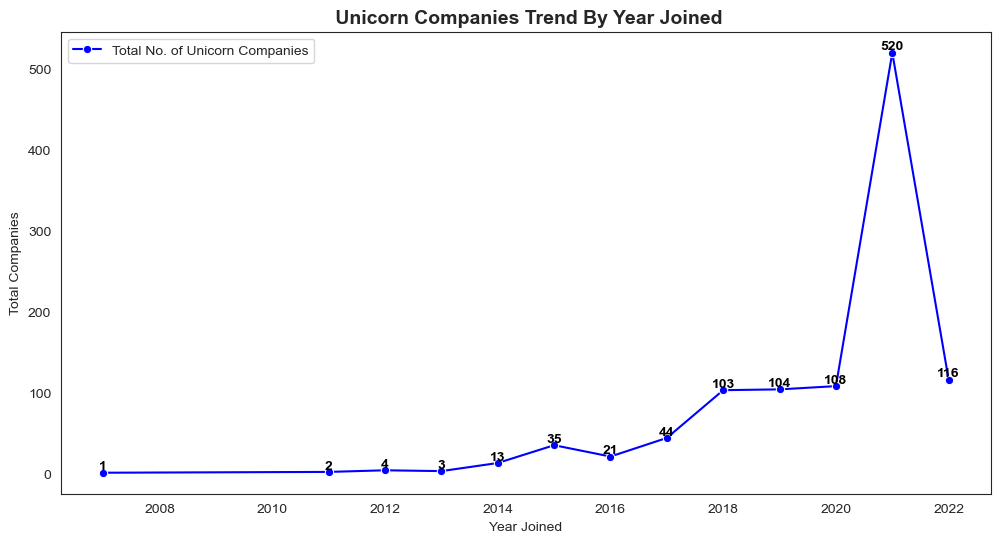

In [99]:
# Unicorn Companies Trend by Year Joined

# Extract year from the 'Date Joined' column
total_companies['Year'] = total_companies['Date Joined'].dt.year

# Sum the total companies by the year they joined
total_companies_by_year = total_companies.groupby('Year')['Total Companies'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.set_style("white")

# Create the line plot
ax = sns.lineplot(x='Year', y='Total Companies', data=total_companies_by_year, marker='o', color='b', label='Total No. of Unicorn Companies')

# Add labels with the count on top of each data point
for index, row in total_companies_by_year.iterrows():
    ax.text(row['Year'], row['Total Companies'], f'{row["Total Companies"]}', ha='center', va='bottom', fontsize=10, color='black', fontweight= 'bold')

# Customize the plot
ax.set(xlabel="Year Joined", ylabel="Total Companies")
plt.title(" Unicorn Companies Trend By Year Joined", fontsize=14, fontweight= 'bold')

plt.show()


### Unicorn Companies Trend By The Year of Joining The Unicorns
### Observation

**Title: "The Evolution of Unicorn Companies: A Journey Through Time"**

**Introduction:**
    
In the ever-evolving landscape of unicorn companies, each year marks a chapter in the story of innovation, growth, and disruption. Today, our journey unfolds through a captivating line plot, tracing the trajectory of total unicorn companies over the years. Each data point on the line signifies not just a number but a snapshot of entrepreneurial fervor and the dynamic evolution of the startup ecosystem.

**Visualization:**
    
Before us, a line gracefully weaves through the canvas, with markers denoting the total number of unicorn companies for each year. The line is more than a visual representation; it is a chronicle of entrepreneurial spirit, a testament to the collective pursuit of groundbreaking ideas.

**Key Insights:**

**Inaugural Sparks:**

The initial years exhibit modest but significant sparks of innovation, with a gradual rise in the number of unicorn companies. Each data point represents the courage of founders venturing into uncharted territory.

**Explosive Growth Phase:**

A sudden surge in the line plot signifies an explosive growth phase. These years witness a proliferation of unicorn companies, reflecting a confluence of technological advancements, favorable market conditions, and entrepreneurial zeal.

**Market Dynamics at Play:**

Peaks and valleys in the line plot unveil the intricate dance of market dynamics. Economic shifts, industry trends, and global events leave their imprints, influencing the ebb and flow of unicorn creation.

**Resilience Amid Challenges:**

Periods of stabilization or minor dips in the line plot highlight the resilience of the unicorn ecosystem. Even in the face of challenges, startups adapt, pivot, and continue to contribute to the innovation narrative.

**Numeric Narratives:**

Atop each data point, numerical annotations provide a tangible dimension to the visual spectacle. Beyond the aesthetics, the numbers articulate the sheer magnitude of total unicorn companies, offering insights into the entrepreneurial landscape.

**Conclusion:**
    
    
As the line gracefully traverses the years, we witness not just a visual representation of data but a profound narrative. The total companies by year joined encapsulate the spirit of innovation, the resilience of entrepreneurs, and the dynamic nature of the startup ecosystem. This line plot is not merely a collection of points; it is a journey through time, a testament to the relentless pursuit of transformative ideas that shape the future of business.


In [100]:
# The Total No. of Companies by Year Founded
total_companies = df.groupby('Year Founded')['Company'].size().reset_index(name= 'Total Companies')
total_companies

,Year Founded,Total Companies
0,1919,1
1,1979,1
2,1984,1
3,1990,1
4,1991,1
5,1992,1
6,1993,1
7,1994,2
8,1995,2
9,1996,1


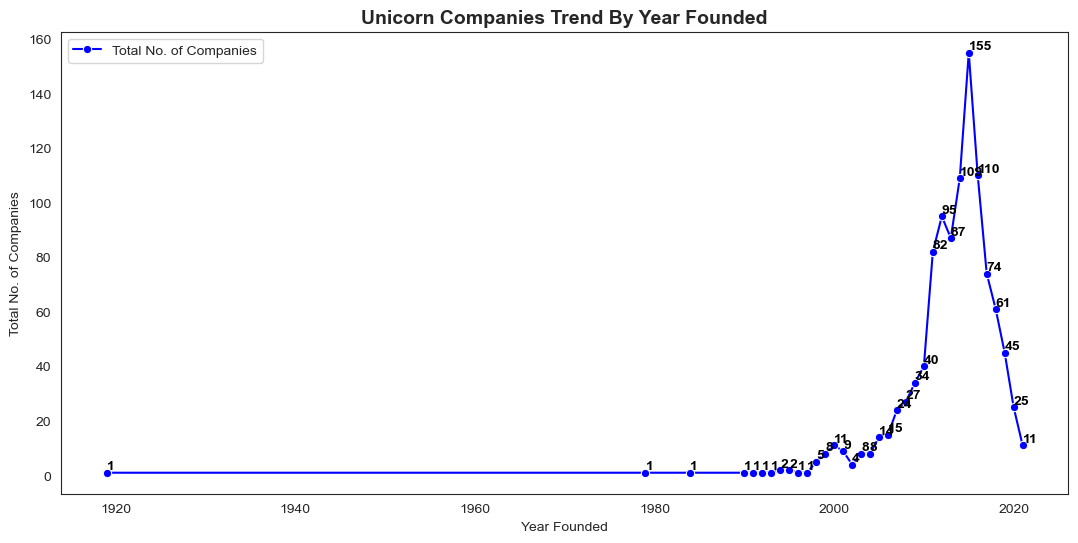

In [101]:
# Unicorn by Companies by Year Founded

# Create a line plot
plt.figure(figsize=(13, 6))  # Adjust the figure size as needed
sns.set_style("white")

# Create the line plot
ax = sns.lineplot(x='Year Founded', y='Total Companies', data=total_companies, marker='o', color='b', label='Total No. of Companies')

# Add labels with the count on top of each data point
for index, row in total_companies.iterrows():
    ax.text(row['Year Founded'], row['Total Companies'], f'{row["Total Companies"]}', ha='left', va='bottom', fontsize=10, color='black', fontweight= 'bold')

# Customize the plot
ax.set(xlabel="Year Founded", ylabel="Total No. of Companies")
plt.title("Unicorn Companies Trend By Year Founded", fontsize=14, fontweight= 'bold' )

plt.show()


### Unicorn Companies By Year Founded
### Observation

**Title: "The Symphony of Innovation: Unfolding the Total Unicorn Companies Over Time"**

**Introduction:**
    
In the grand orchestra of innovation, each year signifies a musical note, contributing to the evolving symphony of unicorn companies. Today, our narrative unfolds through a captivating line plot, a melodic representation of the total number of unicorn companies founded each year. As we embark on this journey, we will witness not just data points but the harmonious crescendo of entrepreneurial spirit echoing through time.

**Visualization:**
    
Before us, a line gracefully traverses the canvas, each marker on the line telling a story of entrepreneurship, vision, and transformation. This line plot is more than a visual representation; it is a testament to the collective pursuit of groundbreaking ideas and the orchestration of the startup landscape.

**Key Insights:**

**Harmony in Inception:**

The early years showcase a gentle rise in the line plot, a harmonic prelude to the burgeoning world of unicorn companies. These foundational years represent the germination of visionary ideas and the inception of the unicorn narrative.

**Explosive Crescendo:**

The line ascends rapidly, reaching a crescendo in certain years. These peaks symbolize periods of explosive growth, where entrepreneurial endeavors flourish, and a multitude of unicorn companies are born, contributing to the symphony of innovation.

**Dynamics of Innovation:**

Undulating patterns in the line plot reveal the dynamics of innovation. Peaks and troughs reflect the ebb and flow of entrepreneurial activity, influenced by technological advancements, market trends, and the ever-changing landscape of business.

**Resonance Across Decades:**

The line extends across decades, resonating with the resilience and adaptability of the startup ecosystem. Even in years of economic challenges or industry shifts, the symphony persists, with entrepreneurs navigating complexities to create transformative companies.

**Numeric Narratives:**

Atop each data point, numerical annotations provide a tangible dimension to the visual spectacle. Beyond the aesthetics, the numbers articulate the sheer magnitude of total unicorn companies, offering insights into the entrepreneurial landscape.

**Conclusion:**
    
    
As the line gracefully traverses the years, we witness not just a visual representation of data but a profound narrative. The total number of companies by year founded encapsulates the spirit of innovation, the resilience of entrepreneurs, and the dynamic nature of the startup ecosystem. This line plot is not merely a collection of points; it is a journey through time, a testament to the relentless pursuit of transformative ideas that shape the future of business.

### MULTIVARIATE ANALYSIS

In [102]:
# Multivariate
# Unicorn Companies Distribution across Cities, Countries and Continents
top_cities = df.groupby(['City', 'Country', 'Continent'])['Company'].size().sort_values(ascending= False)
top_cities

City              Country         Continent    
San Francisco     United States   North America    152
New York          United States   North America    103
Beijing           China           Asia              63
Shanghai          China           Asia              44
London            United Kingdom  Europe            34
                                                  ... 
Inglewood         United States   North America      1
Irving            United States   North America      1
Islandia          United States   North America      1
Jacksonville      United States   North America      1
Lerma de Villada  Mexico          North America      1
Name: Company, Length: 262, dtype: int64

In [ ]:
import plotly.express as px

# Create an interactive map using Plotly Express
fig = px.scatter_geo(top_cities.reset_index(),
                     locations="Country",
                     locationmode="country names",
                     size="Company",
                     color="Company",
                     hover_name="City",
                     projection="natural earth",
                     title="Unicorn Companies Distribution Across Cities, Countries and Continents")

# Show the interactive map
fig.show()

### Unicorn Companies Distribution Across Cities, Countries and continents
### Observation

**Title: "Unicorn Utopia: Mapping the Global Tapestry of Innovation"**

**Introduction:**

In the sprawling landscape of innovation, unicorn companies paint a vivid tapestry, spanning cities, countries, and continents. Today, we embark on an immersive journey through an interactive map, crafted with Plotly Express, to explore the distribution of unicorn companies. This map is not just a visualization; it's a gateway to the vibrant ecosystems, diverse landscapes, and the entrepreneurial heartbeat that defines our global economy.

**Visualization:**
    
Before us unfolds an interactive map, a dynamic canvas that transcends static representations. Each data point on the map is a beacon of innovation, pulsating with the energy of unicorn companies. As we navigate through cities, traverse countries, and explore continents, we unveil a mosaic of entrepreneurship that transcends borders.

**Key Insights:**

**Cityscapes of Innovation:**

The map reveals bustling cityscapes adorned with unicorn companies. From the iconic skylines of San Francisco to the dynamic tech hubs of Beijing, and down to the technological growth in Lagos, each city symbolizes a nucleus of innovation, fostering the growth of transformative startups.

**Countries as Innovation Hubs:**

As we zoom out, countries emerge as vibrant innovation hubs. The map showcases the concentration of unicorn companies in Silicon Valley, the tech corridors of India, the emerging startup ecosystems across Europe, and the birthing of startups in Africa offering a glimpse into the global distribution of innovation.

**Continental Connectivity:**

Continents come alive on the interactive map, connected by threads of entrepreneurship. The Americas, Europe, Asia, Afica and beyond showcase a network of unicorn companies, contributing to a global symphony of economic and technological advancement.

**Hovering over Stories:**

Hovering over each data point on the map unveils stories. From the founding narratives of startups in Tel Aviv to the groundbreaking innovations in Berlin, the interactive features allow us to dive deeper into the rich tapestry of unicorn endeavors.

**Interactive Exploration:**

The map invites us to explore, zooming in to witness the granular details of city clusters and zooming out to appreciate the macroscopic view of global innovation. The interactive elements transform data exploration into an engaging and informative experience.

**Conclusion:**
    
    
As we navigate this interactive map, we transcend geographical boundaries and witness the interconnectedness of the global unicorn landscape. It's more than just a visual representation; it's a testament to the collaborative spirit of entrepreneurship that knows no borders. Unicorn Utopia, as depicted on this map, is a celebration of the diverse, dynamic, and interconnected nature of the innovation ecosystem that propels our world forward.

In [ ]:
# Multivariate
# Unicorn Companies Valuation Spread over the Years
def format_funding(funding):
    if funding >= 1000000000:
        return f'${funding/1000000000:.1f}B'
    elif funding >= 1000000:
        return f'${funding/1000000:.1f}M'
    else:
        return f'${funding}'
    
unicorn_val = df.groupby('Date Joined')['Valuation'].sum().sort_values(ascending= True)
unicorn_val = unicorn_val.apply(format_funding)
unicorn_val

In [ ]:
# Bivariate
# The 5 Industries with the Least Valuation
def format_funding(funding):
    if funding >= 1000000000:
        return f'${funding/1000000000:.1f}B'
    elif funding >= 1000000:
        return f'${funding/1000000:.1f}M'
    else:
        return f'${funding}'
    
least5_ind = df.groupby('Industry')['Valuation'].sum().sort_values(ascending= True).head(10)
least5_ind = least5_ind.apply(format_funding)
least5_ind

In [ ]:
import plotly.express as px
import pandas as pd

# Group by 'Industry' and sum the 'Valuation'
least5_ind = df.groupby('Industry')['Valuation'].sum().sort_values(ascending=True).head(10)

# Reset the index to create a new default integer-based index
least5_ind_reset = least5_ind.reset_index()

# Convert 'Valuation' to numeric format
least5_ind_reset['Valuation'] = pd.to_numeric(least5_ind_reset['Valuation'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with NaN values in 'Valuation'
least5_ind_reset = least5_ind_reset.dropna(subset=['Valuation'])

# Create a treemap
fig = px.treemap(least5_ind_reset, 
                 path=['Industry'], 
                 values='Valuation',
                 color='Valuation',
                 color_continuous_scale='viridis',  # You can change the color scale as desired
                 title='Top 10 Industries by Valuation')

# Show the treemap
fig.show()

### How long does it usually take for a company to become a unicorn?
### Has it always been this way?

The time it takes for a company to become a unicorn, meaning it reaches a valuation of $1 billion or more, can vary widely. However, there are some general trends and observations.

**1. Varied Timelines:**

The time it takes for a company to achieve unicorn status depends on factors such as industry, business model, market conditions, and funding availability. Some companies may achieve unicorn status relatively quickly, within a few years of founding, especially in rapidly growing sectors like technology. Others may take longer to reach that valuation milestone.

**2. Technology Sector Speed:**

In the technology sector, particularly in areas like software, internet services, and artificial intelligence, there have been instances of companies achieving unicorn status in a relatively short time. This rapid growth is often attributed to the scalability of digital products and services.

**3. Historical Perspective:**

Unicorn companies have become more prevalent in the last decade, and the term itself gained popularity around 2013. The rise of unicorns is often associated with the surge in venture capital funding and interest in innovative startups. Historically, achieving a valuation of $1 billion or more was a rare feat, but it has become more common in recent years.

**4. Factors Contributing to Acceleration:**

Several factors have contributed to the acceleration of companies reaching unicorn status. These include the availability of significant venture capital funding, a globalized economy that allows companies to scale more rapidly, and the emergence of new industries and business models.

**5. Globalization and Technology:**

The interconnected nature of the global economy and the rapid advancement of technology have facilitated the growth of companies with the potential to achieve unicorn status. The ability to reach a global audience, access capital from international investors, and leverage digital platforms for distribution have all played roles in the shortened timelines for some companies.

**6. Industry-Specific Factors:**

Certain industries, such as fintech, biotech, and e-commerce, may have different trajectories for achieving unicorn status. Regulatory considerations, research and development timelines, and market adoption rates can significantly impact the time it takes for companies in these sectors to reach a $1 billion valuation.

**7. Market Conditions:**

    
Economic and market conditions also play a crucial role. During periods of economic growth and increased investor confidence, companies may find it easier to secure funding and grow rapidly.
In summary, while there is no fixed timeline for a company to become a unicorn, the landscape has evolved over the years with a notable increase in the number of unicorns and a trend toward faster valuations, particularly in certain sectors. The dynamics of venture capital, globalization, and technology have all contributed to shaping the current environment for unicorn companies.

### What Are The Growth Recommendations for Unicorn Companies

The growth recommendations for unicorn companies, which are private startups valued at $1 billion or more, can vary depending on the industry, business model, and specific circumstances of each company. However, some general growth strategies and recommendations can be considered:

**Strategic Vision and Clarity:**

Maintain a clear and compelling vision for the company's future. This vision should guide strategic decisions, resonate with stakeholders, and inspire the team. Clearly define long-term goals and the path to achieving them.

**Market Expansion:**

Explore opportunities for market expansion. This can involve entering new geographic regions, targeting additional customer segments, or diversifying product and service offerings. A comprehensive market expansion strategy can contribute to sustained growth.

**Innovation and Differentiation:**

Prioritize innovation to stay ahead of competitors and meet evolving customer needs. Continuous improvement of products, services, and processes can enhance a company's competitive edge. Differentiation in the market is often a key factor in sustained growth.

**Talent Acquisition and Development:**

Build a talented and diverse team. Attract top-tier talent, invest in employee development, and foster a culture of innovation. A skilled and motivated workforce is crucial for executing growth strategies and adapting to industry changes.

**Customer-Centric Approach:**

Maintain a strong focus on customer satisfaction. Understand customer needs, gather feedback, and tailor products or services accordingly. A customer-centric approach can lead to increased loyalty, positive word-of-mouth, and sustained growth.

**Strategic Partnerships and Alliances:**

Explore strategic partnerships and alliances that can accelerate growth. Collaborating with complementary businesses, forming alliances with industry leaders, or entering into joint ventures can provide access to new markets, technologies, or resources.

**Scalability and Operational Efficiency:**

Ensure that the company's operations are scalable. Invest in technologies and processes that allow for efficient scaling without compromising quality. Operational excellence is vital for managing growth effectively.

**Data-Driven Decision-Making:**

Embrace data-driven decision-making. Leverage data analytics to gain insights into customer behavior, market trends, and internal operations. Informed decision-making can lead to more effective strategies and resource allocation.

**Financial Discipline:**

Maintain financial discipline and transparency. Implement robust financial management practices, monitor key performance indicators, and allocate resources strategically. Strong financial health is fundamental to sustaining growth.

**Adaptability and Agility:**

Foster a culture of adaptability and agility. The business landscape is dynamic, and unicorn companies should be prepared to pivot when necessary. An agile organization can respond quickly to market changes and capitalize on emerging opportunities.

**Global Expansion and Internationalization:**

Consider opportunities for global expansion. Unicorn companies often have the potential to operate on a global scale. Expanding internationally can unlock new markets, customer bases, and revenue streams.

**Brand Building and Reputation Management:**

Invest in brand building and reputation management. A strong brand can enhance customer trust, attract top talent, and differentiate the company in the market. Proactively manage the company's reputation to mitigate potential risks.
Remember, the effectiveness of these recommendations depends on the specific context and challenges faced by each unicorn company. Regular reassessment of the business strategy, flexibility in adapting to changing circumstances, and a commitment to continuous improvement are key components of successful growth strategies for unicorn companies.